**This colab notebook contains scripts for ad-hoc analysis. Every analysis part is prefixed with a description**

**Analysis of ratios of data points (TN/TP/SP/....)**


This section contains stats about the ratios of categories of the data points as well as the points about their metrics (How many are TP, what is the average F1 score, .....)

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
extension = '/content'
selected_sig_df = pd.read_csv(extension + '/more_than_10_alert_summaries_speedometer3_tp6.csv', index_col=False)
stat_df = pd.read_csv(extension + '/alert_status_summary.csv', index_col=False)

In [ ]:
display(stat_df.head(5))

file_name    TN  TP  FP  FN  SP  Precision_SP_as_TP  \
0  5093479_timeseries_data.csv   181   1   0   0   1                 1.0   
1  4974900_timeseries_data.csv   937   1   0   0   0                 1.0   
2  4928648_timeseries_data.csv  2042   2   0   0   5                 1.0   
3  4975029_timeseries_data.csv   850   3   0   0   0                 1.0   
4  4775529_timeseries_data.csv  2054   1   0   0   1                 1.0   

   Recall_SP_as_TP  F1_Score_SP_as_TP  Precision_SP_as_FP  Recall_SP_as_FP  \
0              1.0                1.0            0.500000              1.0   
1              1.0                1.0            1.000000              1.0   
2              1.0                1.0            0.285714              1.0   
3              1.0                1.0            1.000000              1.0   
4              1.0                1.0            0.500000              1.0   

   F1_Score_SP_as_FP  
0           0.666667  
1           1.000000  
2           0.444444  
3           1.000000  
4           0.666667

In [ ]:
stat_df['signature_id'] = stat_df['file_name'].str.extract(r'(\d+)')
stat_df['TN_SP'] = stat_df['TN'] + stat_df['SP']
stat_df['total_num'] = stat_df['TN'] + stat_df['SP'] + stat_df['FP'] + stat_df['FN'] + stat_df['TP']

In [ ]:
# The False Positives are composed of the alerts with summaries that are false positive and the alerts with summaries that are still processing
stat_df['Precision'] = stat_df['TP'] / (stat_df['TP'] + (stat_df['FP'] + stat_df['SP']))
stat_df['Recall'] = stat_df['TP'] / (stat_df['TP'] + stat_df['FN'])
stat_df['F1_Score'] = 2 * (stat_df['Precision'] * stat_df['Recall']) / (stat_df['Precision'] + stat_df['Recall'])

stat_df['Precision_SP_is_TP'] = (stat_df['TP'] + stat_df['SP']) / ((stat_df['TP'] + stat_df['SP']) + stat_df['FP'])
stat_df['Recall_SP_is_TP'] = (stat_df['TP'] + stat_df['SP']) / ((stat_df['TP'] + stat_df['SP']) + stat_df['FN'])
stat_df['F1_Score_SP_is_TP'] = 2 * (stat_df['Precision_SP_is_TP'] * stat_df['Recall_SP_is_TP']) / (stat_df['Precision_SP_is_TP'] + stat_df['Recall_SP_is_TP'])

In [ ]:
# Calculate the sum of numerical columns for the filtered DataFrame
numerical_cols = stat_df.select_dtypes(include=['number']).columns
column_sums = stat_df[numerical_cols].sum()
# stat_df[numerical_cols] = stat_df[numerical_cols].map('{:.2f}'.format)
#pd.set_option('display.float_format', '{:.2f}'.format)
# Display the column sums
print("Sum of numerical columns in stat_df:")
display(column_sums)

Sum of numerical columns in stat_df:


TN                    1.053654e+07
TP                    1.019500e+04
FP                    8.460000e+02
FN                    2.820000e+02
SP                    6.662000e+03
Precision_SP_as_TP    5.382983e+03
Recall_SP_as_TP       5.461528e+03
F1_Score_SP_as_TP     5.400748e+03
Precision_SP_as_FP    3.503026e+03
Recall_SP_as_FP       4.321864e+03
F1_Score_SP_as_FP     3.756980e+03
TN_SP                 1.054321e+07
total_num             1.055453e+07
Precision             3.503026e+03
Recall                4.321864e+03
F1_Score              3.756980e+03
Precision_SP_is_TP    5.382983e+03
Recall_SP_is_TP       5.461528e+03
F1_Score_SP_is_TP     5.400748e+03
dtype: float64

The following graphs showcase the distribution of number of alerts per alert summary according to the status of the alert summary. We mainly notice that alert summaries with FN are associated generally with one alert (For definition, we decided that every alert summary with at least one alert that is created manually should be classified as FN, subsequently making all its respective alerts inherit the same status). They also showcase the distribution of the metrics values across the timeseries signatures.

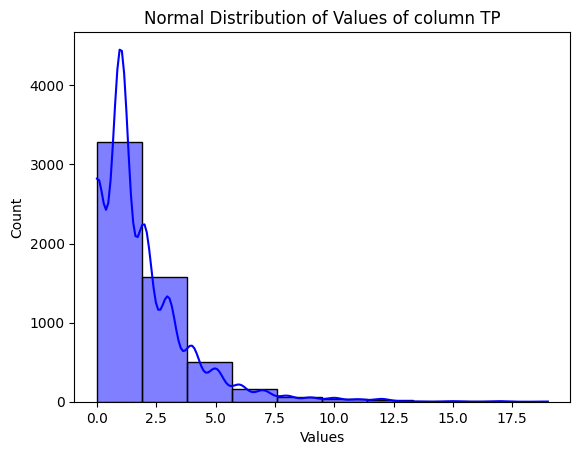

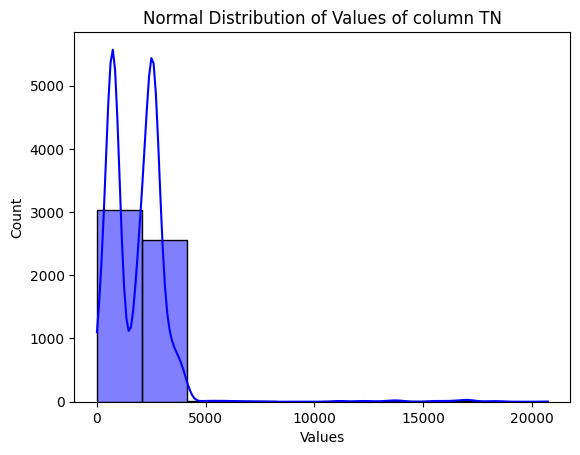

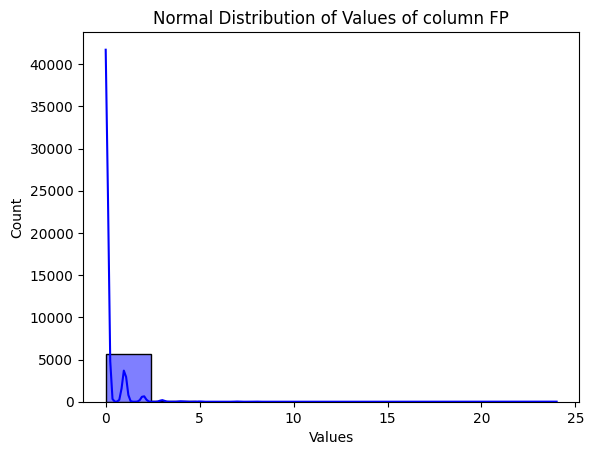

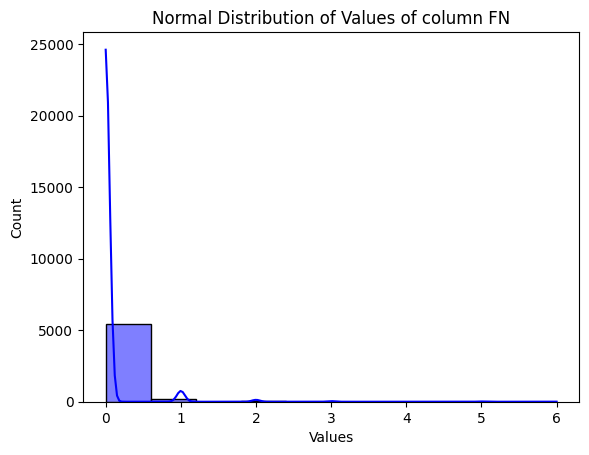

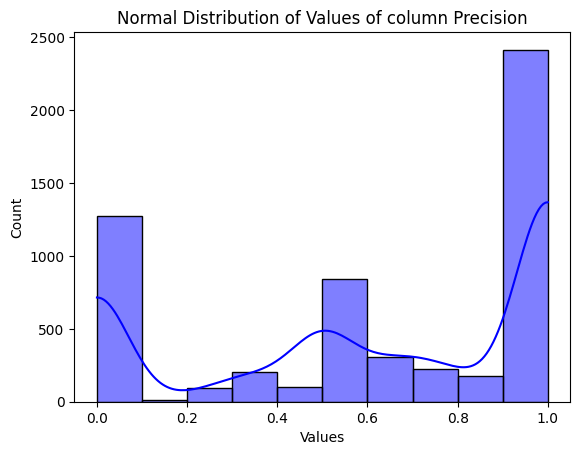

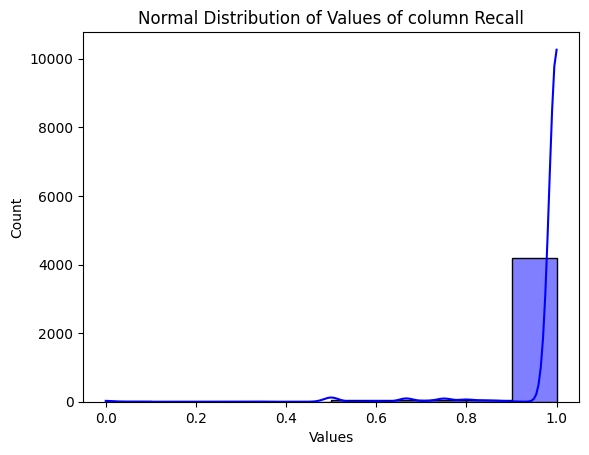

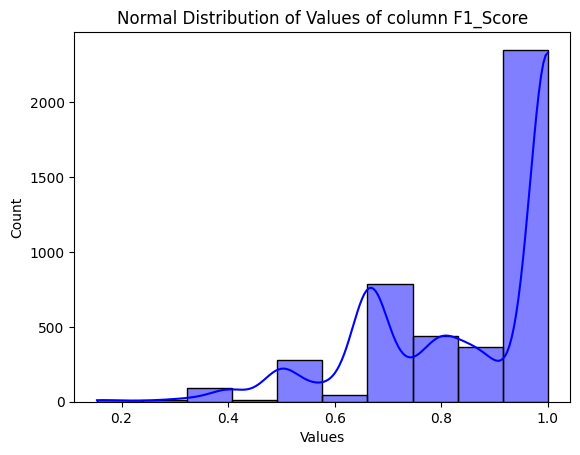

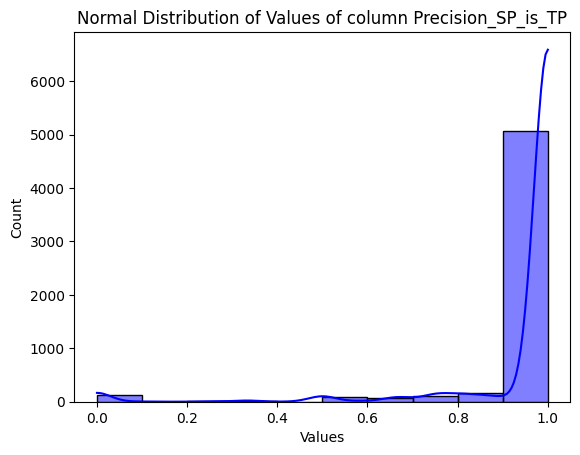

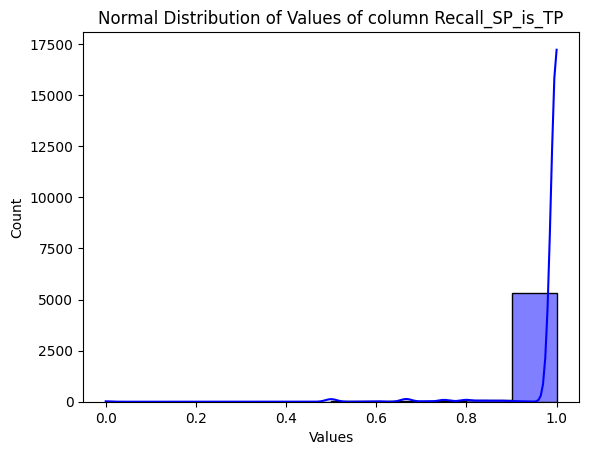

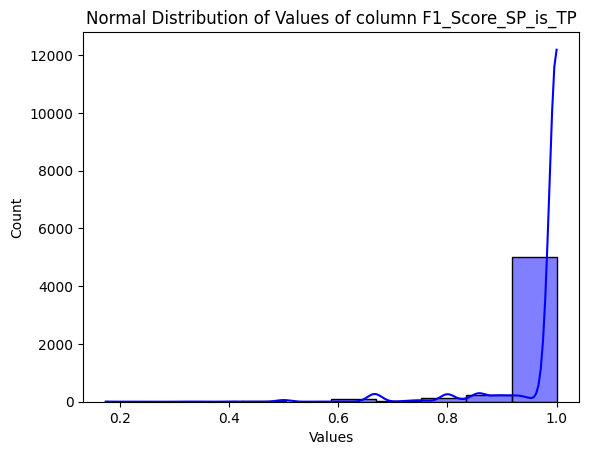

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'F1_Score', 'Precision_SP_is_TP', 'Recall_SP_is_TP', 'F1_Score_SP_is_TP']
for col in cols:
  sns.histplot(stat_df[col], kde=True, color='blue', bins=10)

  # Add labels and title
  plt.title('Normal Distribution of Values of column '+ col)
  plt.xlabel('Values')
  plt.ylabel('Count')

  # Show the plot
  plt.show()


In [ ]:
numerical_cols = filtered_stat_df.select_dtypes(include=['number']).columns
column_sums = filtered_stat_df[numerical_cols].sum()

# Display the column sums
print("Sum of numerical columns in filtered_stat_df:")
display(column_sums)

In [ ]:
columns_to_average = ["Precision", "Recall", "F1_Score", 'Precision_SP_is_TP', 'Recall_SP_is_TP', 'F1_Score_SP_is_TP']
average_values = stat_df[columns_to_average].mean()
display(average_values)

Precision             0.620224
Recall                0.982912
F1_Score              0.856389
Precision_SP_is_TP    0.953078
Recall_SP_is_TP       0.988154
F1_Score_SP_is_TP     0.978219
dtype: float64

In [ ]:
selected_sig_list = selected_sig_df['test_series_signature_id'].unique()
selected_sig_list = list(map(str, selected_sig_list))

In [ ]:
filtered_stat_df = stat_df[stat_df['signature_id'].isin(selected_sig_list)]
display(filtered_stat_df.head(5))

file_name    TN  TP  FP  FN  SP  Precision_SP_as_TP  \
212   4967592_timeseries_data.csv  1254   4   0   0   7            1.000000   
341   4864567_timeseries_data.csv  1492   9   2   1   0            0.818182   
945   4967471_timeseries_data.csv  1589   2   0   0  10            1.000000   
964   4967483_timeseries_data.csv  1402   6   0   0   9            1.000000   
1081  4722823_timeseries_data.csv  2266  12   4   5   0            0.750000   

      Recall_SP_as_TP  F1_Score_SP_as_TP  Precision_SP_as_FP  Recall_SP_as_FP  \
212          1.000000           1.000000            0.363636         1.000000   
341          0.900000           0.857143            0.818182         0.900000   
945          1.000000           1.000000            0.166667         1.000000   
964          1.000000           1.000000            0.400000         1.000000   
1081         0.705882           0.727273            0.750000         0.705882   

      F1_Score_SP_as_FP signature_id  TN_SP  total_num  Precision    Recall  \
212            0.533333      4967592   1261       1265   0.363636  1.000000   
341            0.857143      4864567   1492       1504   0.818182  0.900000   
945            0.285714      4967471   1599       1601   0.166667  1.000000   
964            0.571429      4967483   1411       1417   0.400000  1.000000   
1081           0.727273      4722823   2266       2287   0.750000  0.705882   

      F1_Score  Precision_SP_is_TP  Recall_SP_is_TP  F1_Score_SP_is_TP  
212   0.533333            1.000000         1.000000           1.000000  
341   0.857143            0.818182         0.900000           0.857143  
945   0.285714            1.000000         1.000000           1.000000  
964   0.571429            1.000000         1.000000           1.000000  
1081  0.727273            0.750000         0.705882           0.727273

The following table represents the stats of averages of the metrics for the sample dataset utilized to generate the predictions

In [ ]:
filtered_average_values = stat_df[stat_df['signature_id'].isin(selected_sig_list)][columns_to_average].mean()
display(filtered_average_values)

Precision             0.452159
Recall                0.971837
F1_Score              0.595179
Precision_SP_is_TP    0.932873
Recall_SP_is_TP       0.980114
F1_Score_SP_is_TP     0.954125
dtype: float64

**Visualizing one timeseries**


The following part helps with generating the graphical visualizations of the Mozilla prediction, the baseline, and the CPDs predictions for one given timeseries signature. The needed files to conduct the visualization are as follows:
- *The CSV for the timeseries* : The CSV file having the labeled data points (TN, FN, TP, ....). This could be found in the `data` directory in the Github project
- *The summary file* : After generating the prediciton using TCPDBench, we get the summary file for the timeseries signature we would liek to visualize. This file contains the change point locations that are predicted by the utilized CPD methods

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import os

In [ ]:
def display_sample(dataf, sig_id, only_true=True, custom_indices=None):
    sample_df = dataf.copy()

    #plt.figure(figsize=(12, 8))
    plt.figure(figsize=(20, 10))
    color_mapping = {
        'TP': 'green',
        'FP': 'red',
        'SP': 'grey',
        'TN': 'blue',
        'FN': 'yellow'
    }

    for idx, row in sample_df.iterrows():
        plt.plot(idx, row['value'], marker='o', markersize=8, color=color_mapping.get(row['alert_status_general']), alpha=0.6)
        line_idx = []
        if only_true:
          line_idx = ['TP', 'FN']
        else:
          line_idx = ['TP', 'FN', 'FP', 'SP']

        # Add vertical line corresponding to each data point of interest
        if row['alert_status_general'] in line_idx:
            plt.axvline(x=idx, color=color_mapping.get(row['alert_status_general']), linestyle='--', alpha=0.4)

        if custom_indices:
            for idx in custom_indices:
                plt.axvline(x=idx, color='purple', linestyle='--', alpha=0.6)

    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel(f'Test measurement values associated with signature ID {sig_id}')
    #plt.grid(True)
    plt.grid(axis='y')
    plt.xlim(sample_df.index.min(), sample_df.index.max())
    y_min = 0
    y_max = sample_df['value'].max() * 1.5
    plt.ylim(bottom=y_min, top=y_max)
    start_date = sample_df.index.min()
    end_date = sample_df.index.max()
    weekly_ticks = pd.date_range(start=start_date, end=end_date, freq='W-MON')
    plt.xticks(weekly_ticks, rotation=45)
    plt.show()

In [ ]:
import json
with open('/content/summary_4361184.json', 'r') as file:
    data = json.load(file)['results']
df_dict = dict()
pred_data = []
for i in data:
  max_f1 = -1
  for j in data[i]:
    entry_dict = dict()
    if (j['status'] == 'SUCCESS'):
      if (j['scores']['f1'] > max_f1):
        entry_dict['algorithm'] = i
        entry_dict['cplocations'] = j['cplocations']
        entry_dict['f1'] = j['scores']['f1']
        max_f1 = j['scores']['f1']
    if (entry_dict):
      pred_data.append(entry_dict)
pred_df = pd.DataFrame(pred_data)

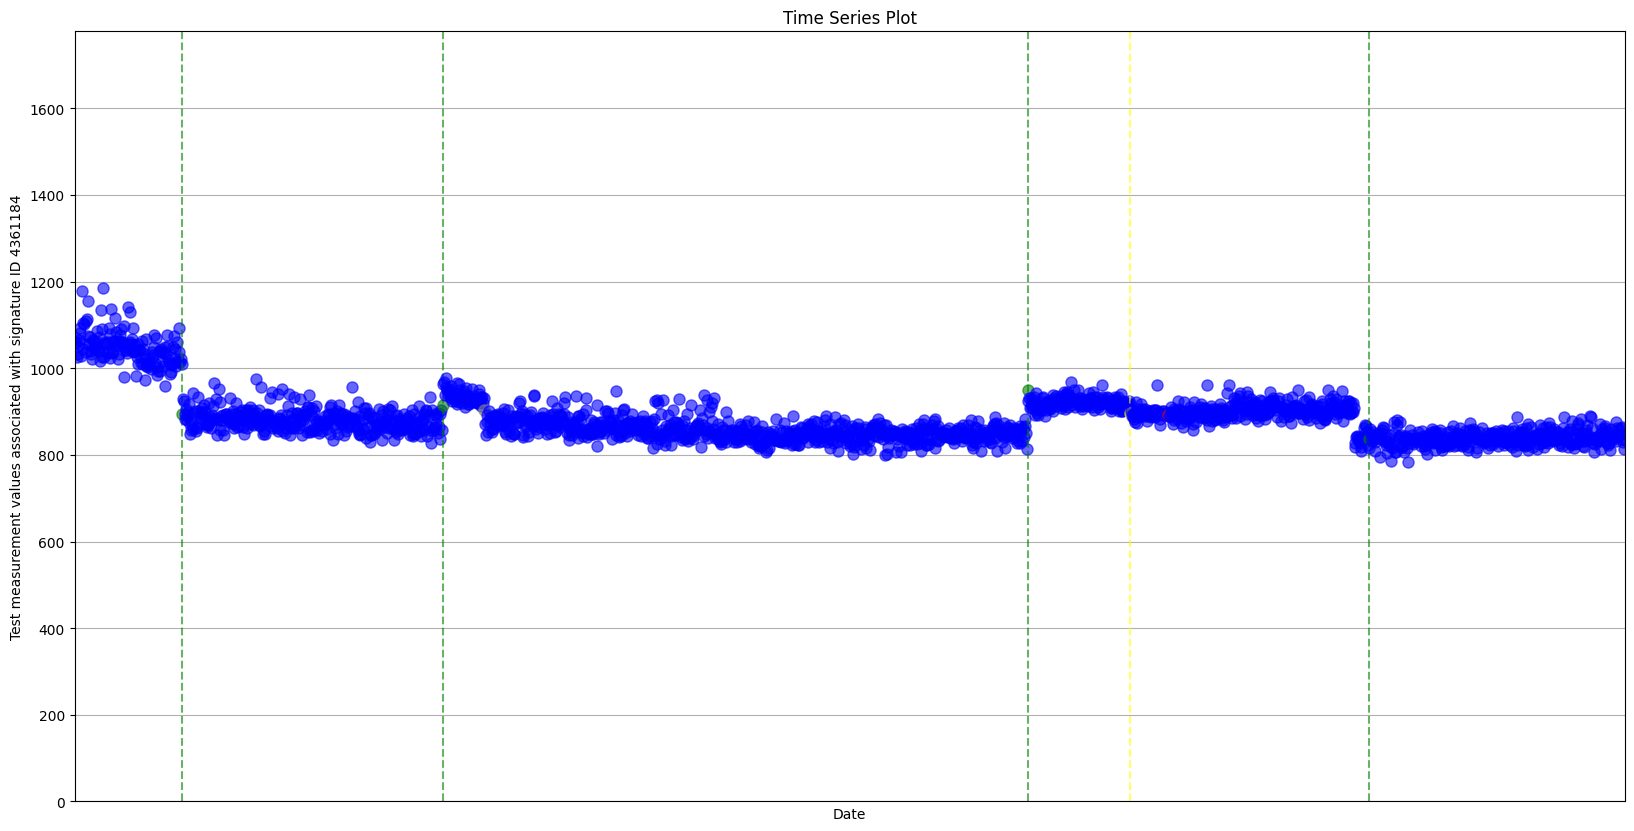

In [ ]:
main_dir = '/content'
#for csv_file in os.listdir(main_dir):
#for csv_file in ['3869261_timeseries_data.csv', '4361184_timeseries_data.csv']:
for csv_file in ['4361184_timeseries_data.csv']:
    if not csv_file.endswith('.csv'):
        continue
    csv_path = os.path.join(main_dir, csv_file)
    df = pd.read_csv(csv_path)
    sig_id = csv_file.split('_')[0]
    display_sample(df, sig_id, False)

best_amoc
0.5


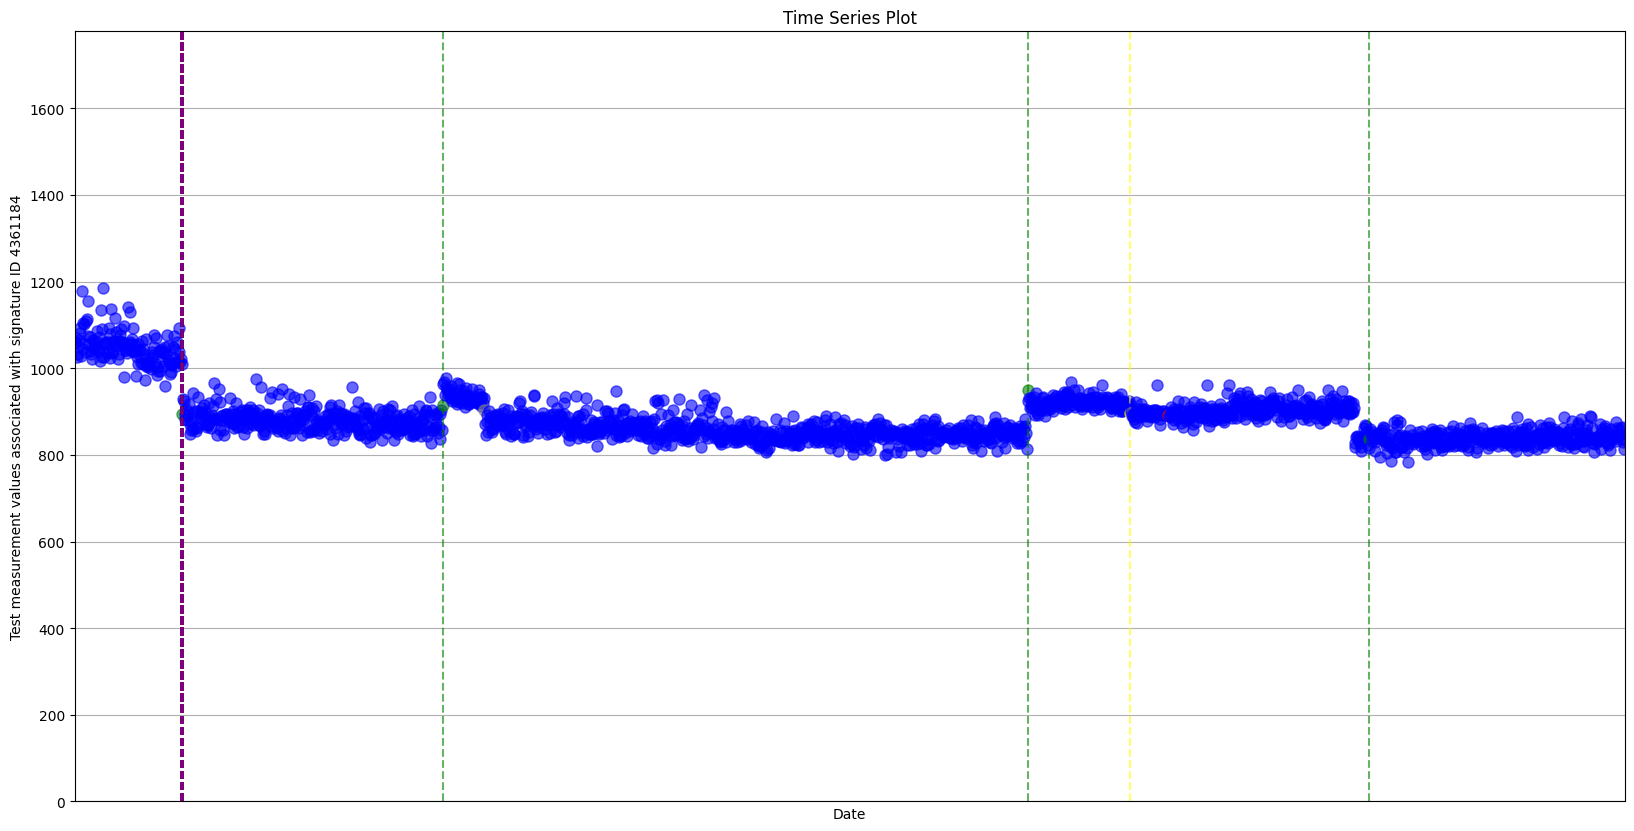

best_binseg
0.5


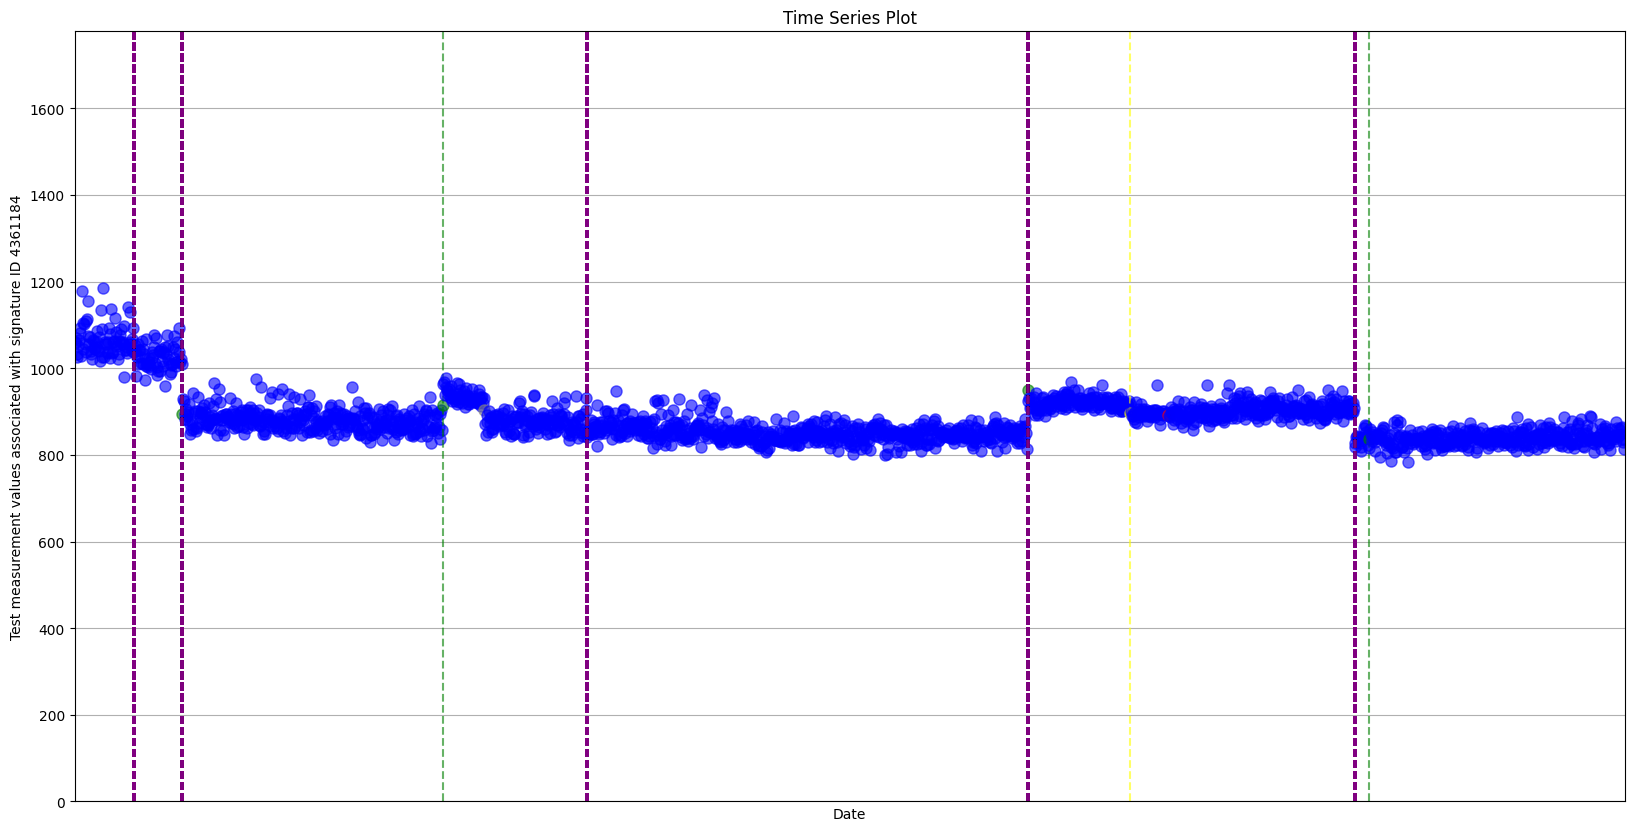

best_binseg
0.6666666666666666


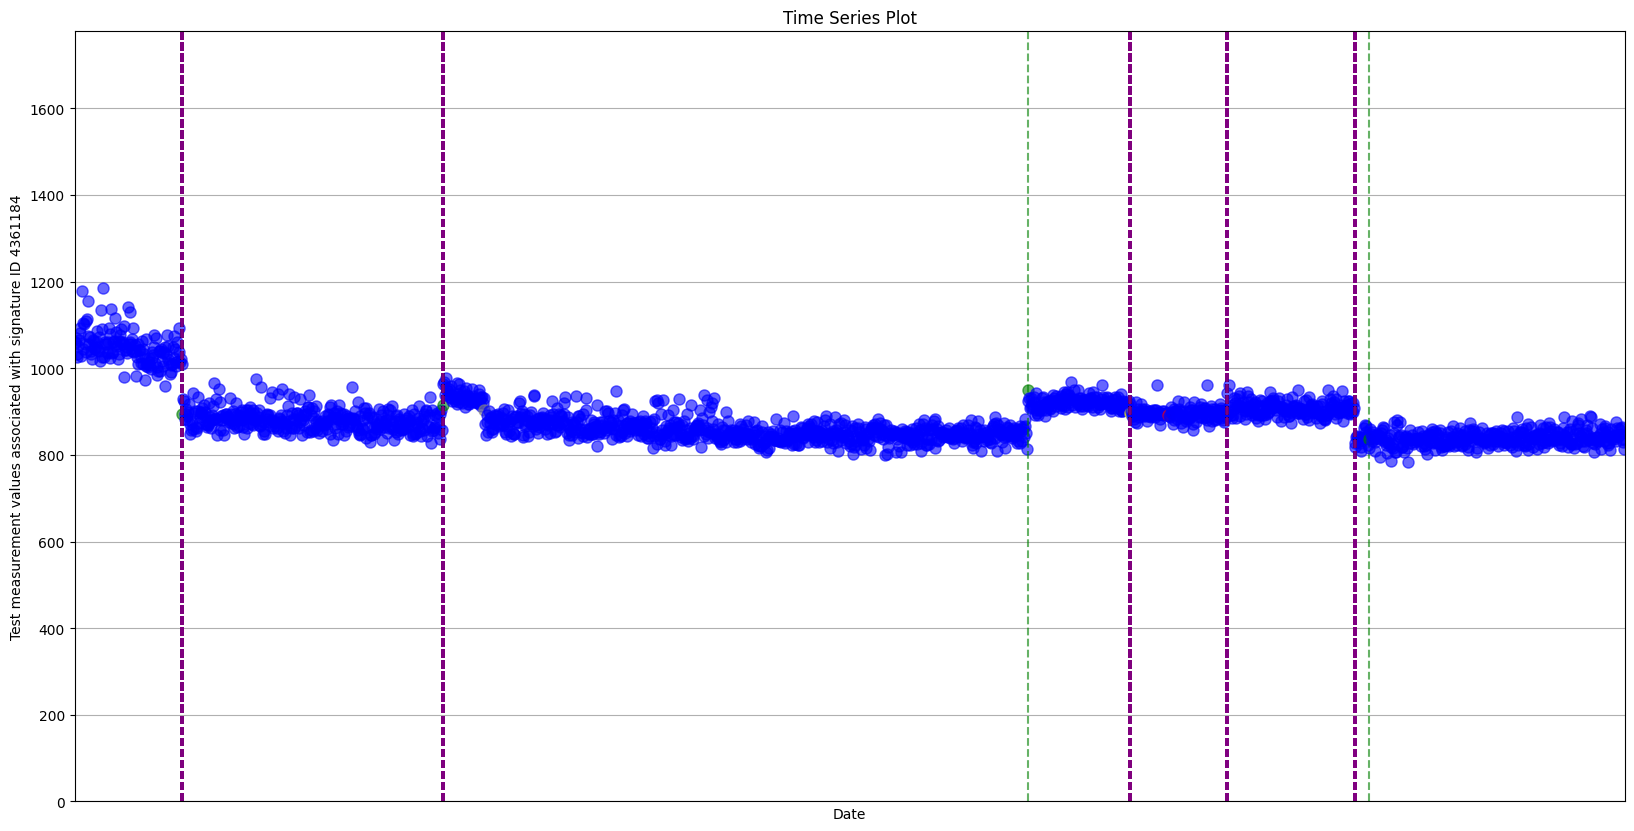

best_bocpd
0.5


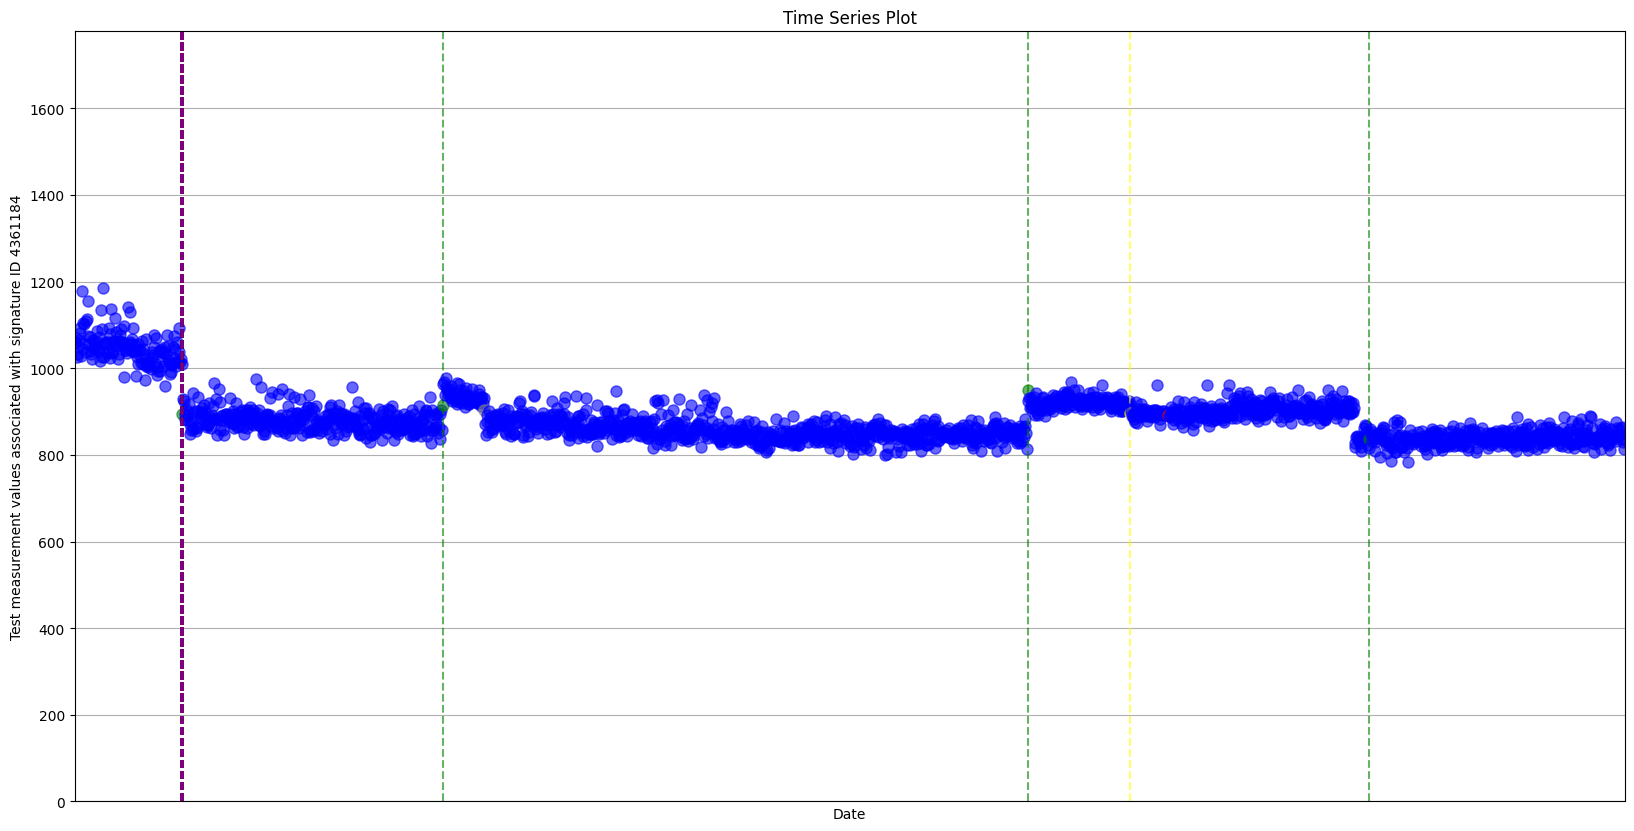

best_bocpd
0.7142857142857143


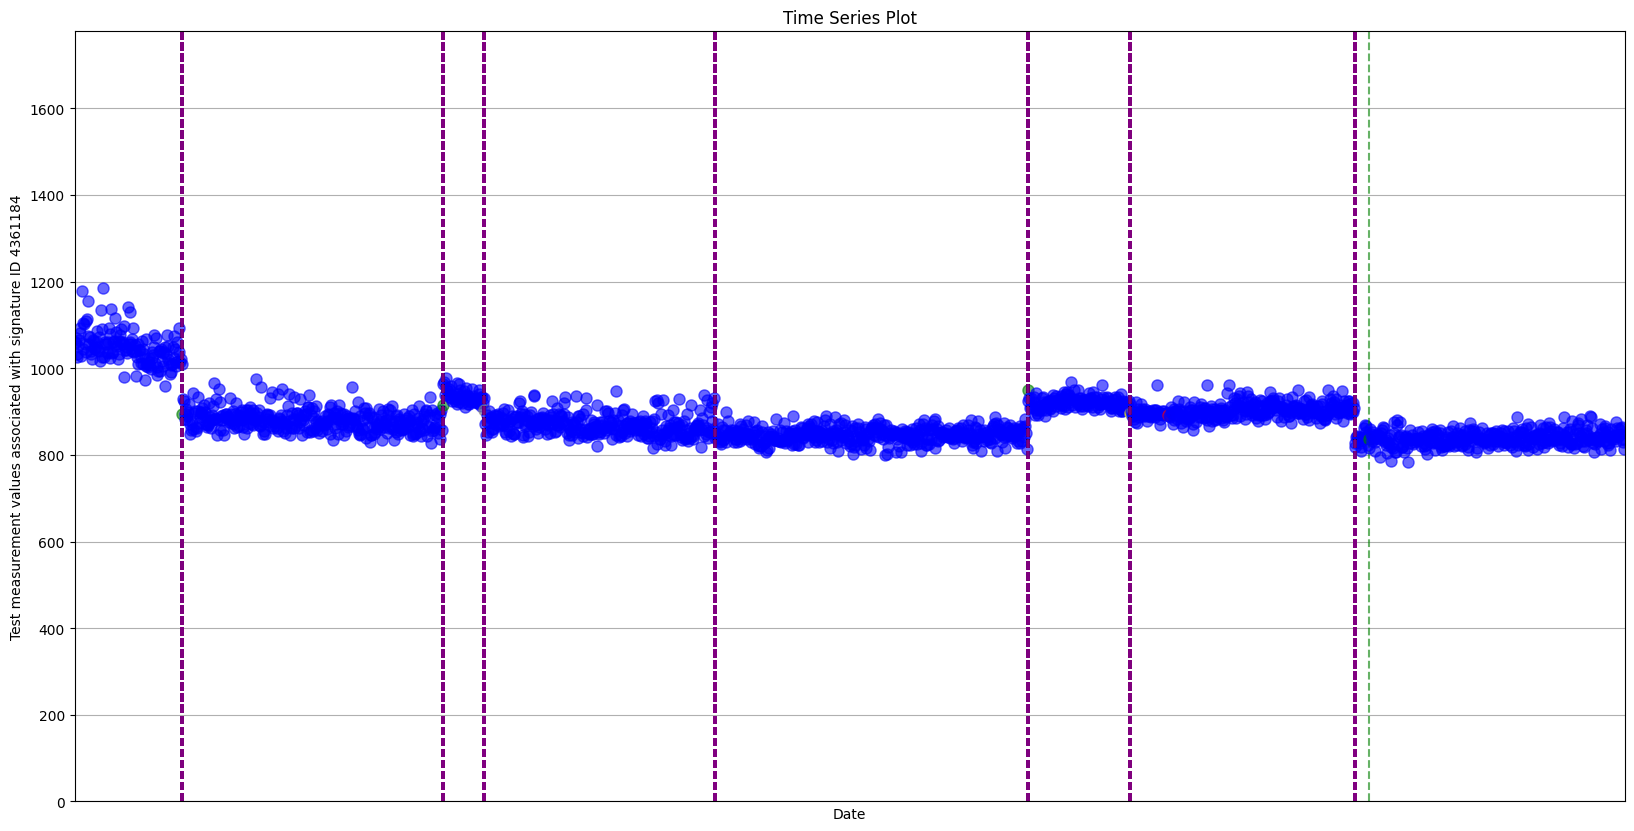

best_cpnp
0.06030150753768843


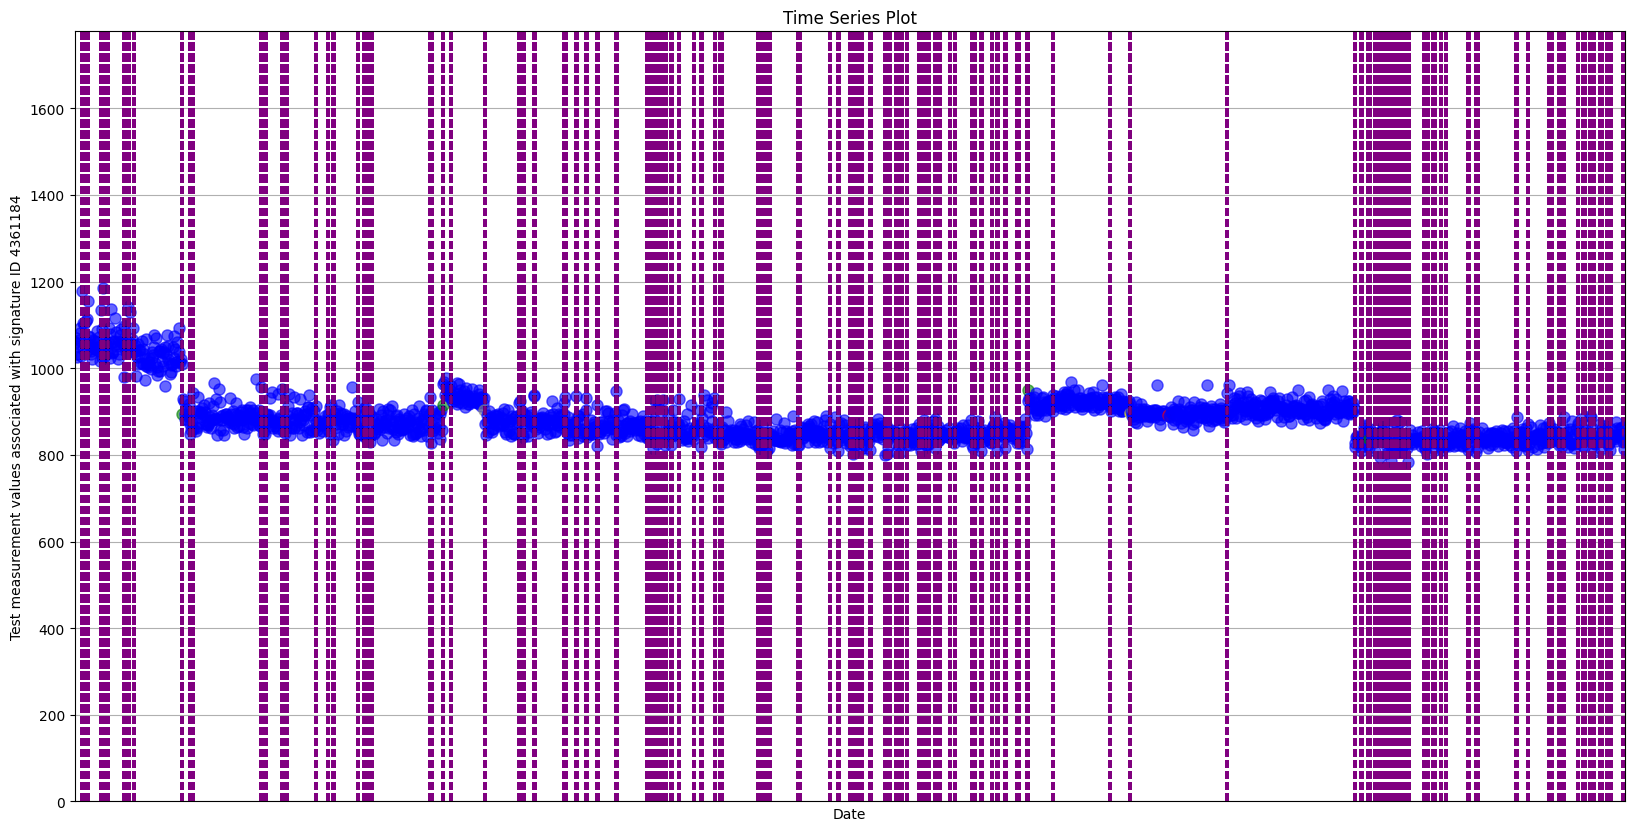

best_cpnp
0.19999999999999998


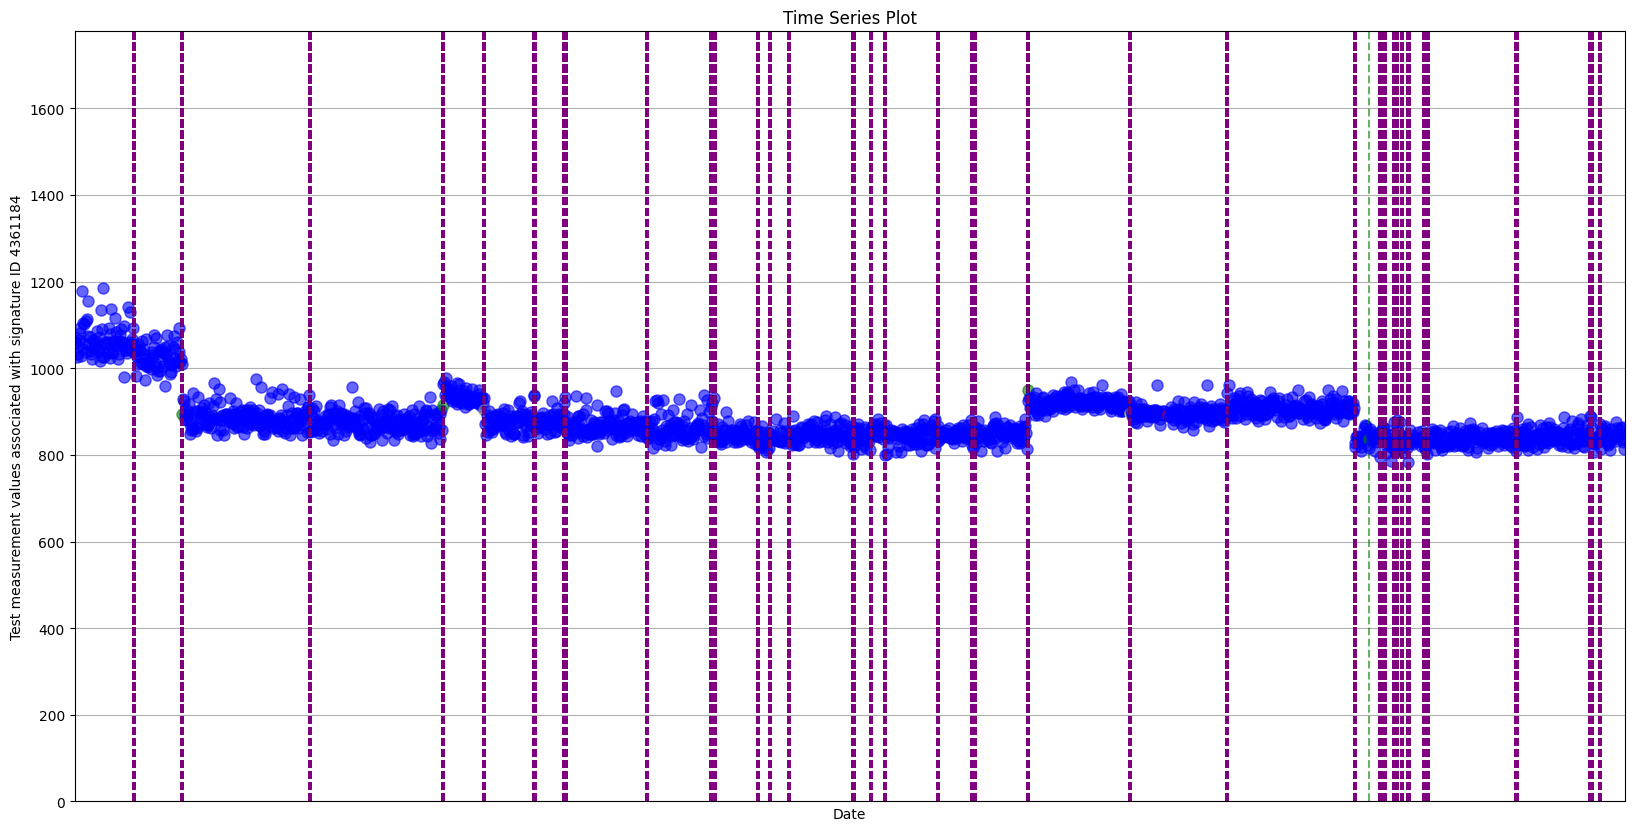

best_cpnp
0.5263157894736842


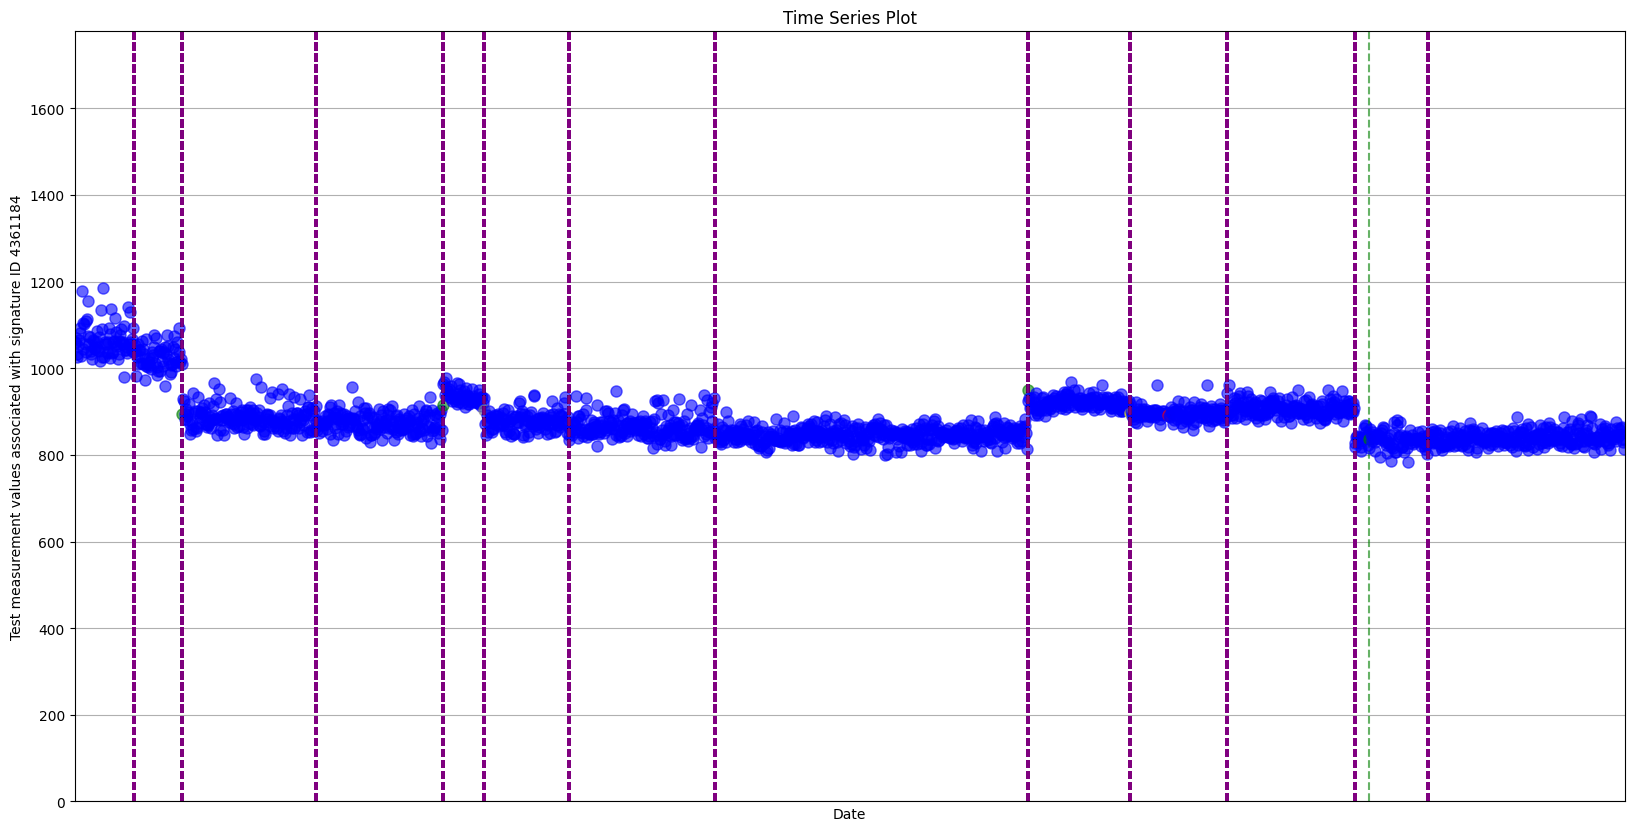

best_cpnp
0.5882352941176471


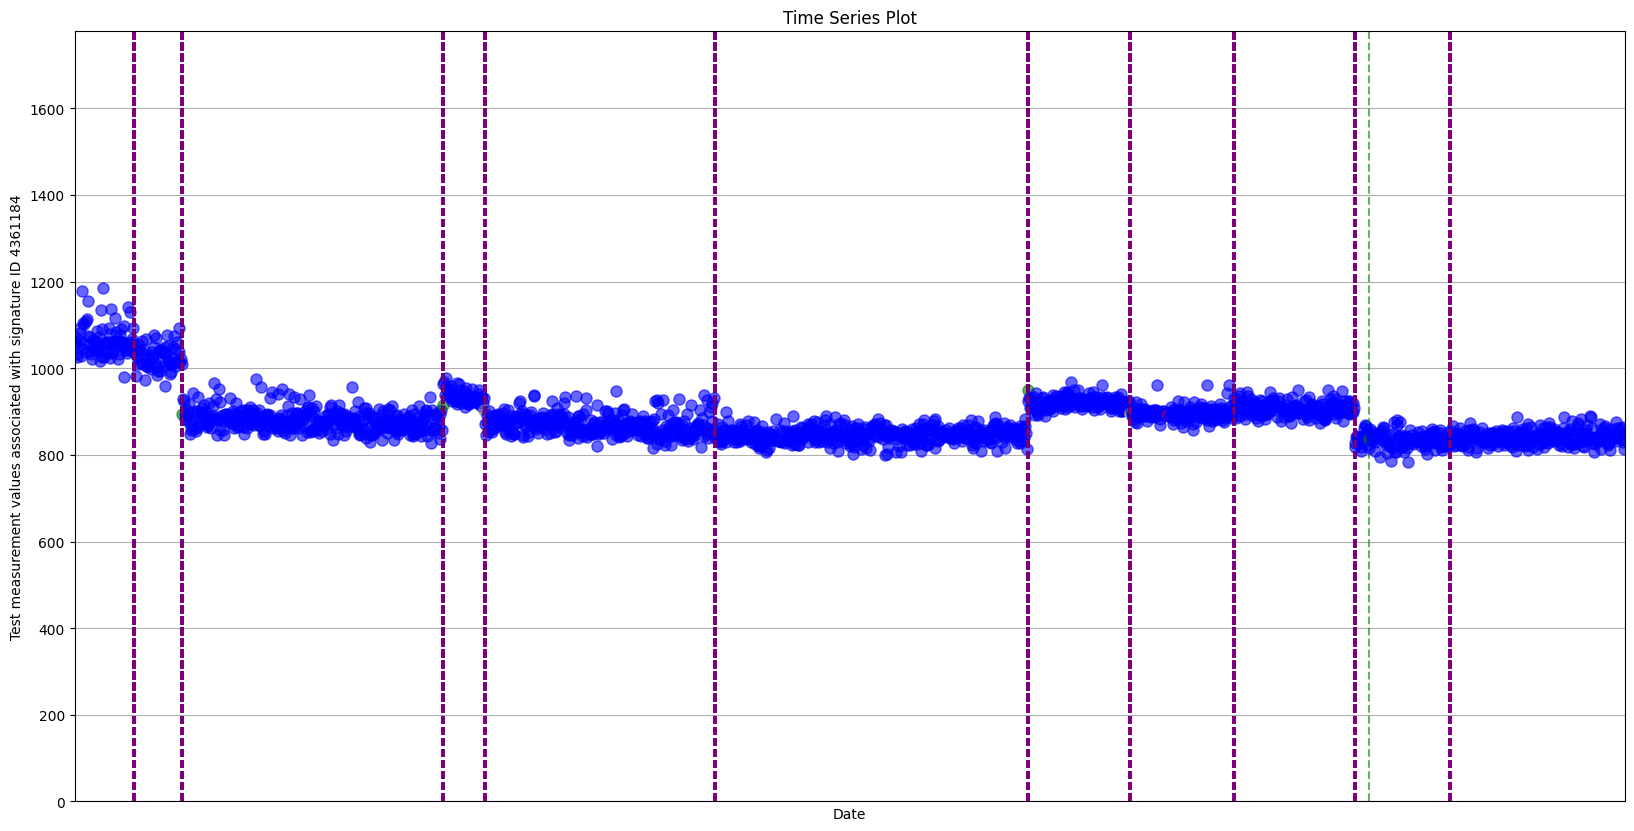

best_kcpa
0.6666666666666666


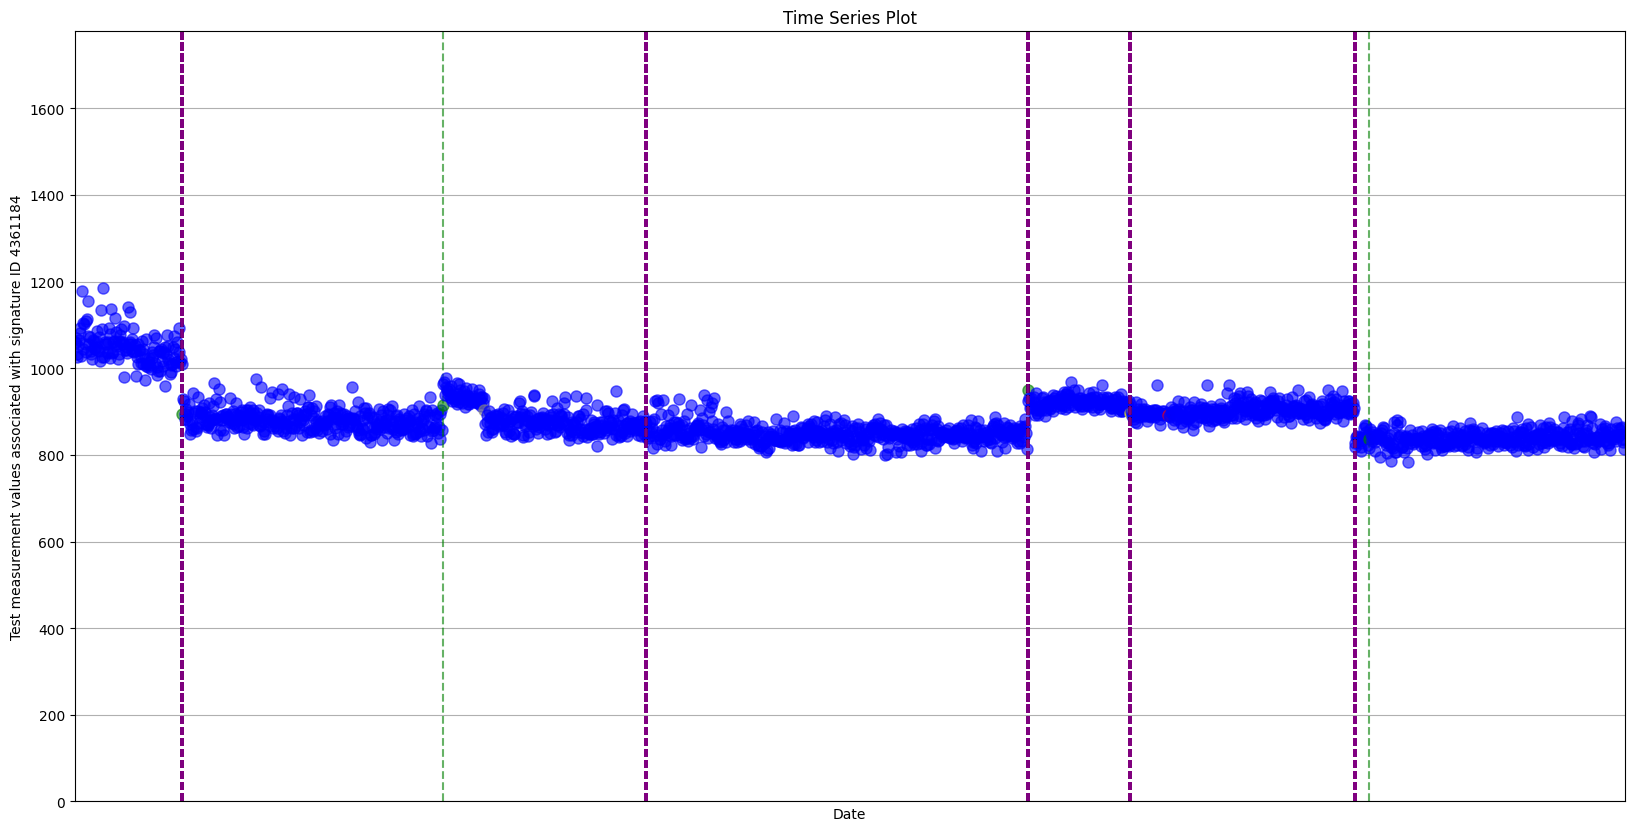

best_mongodb
0.5555555555555556


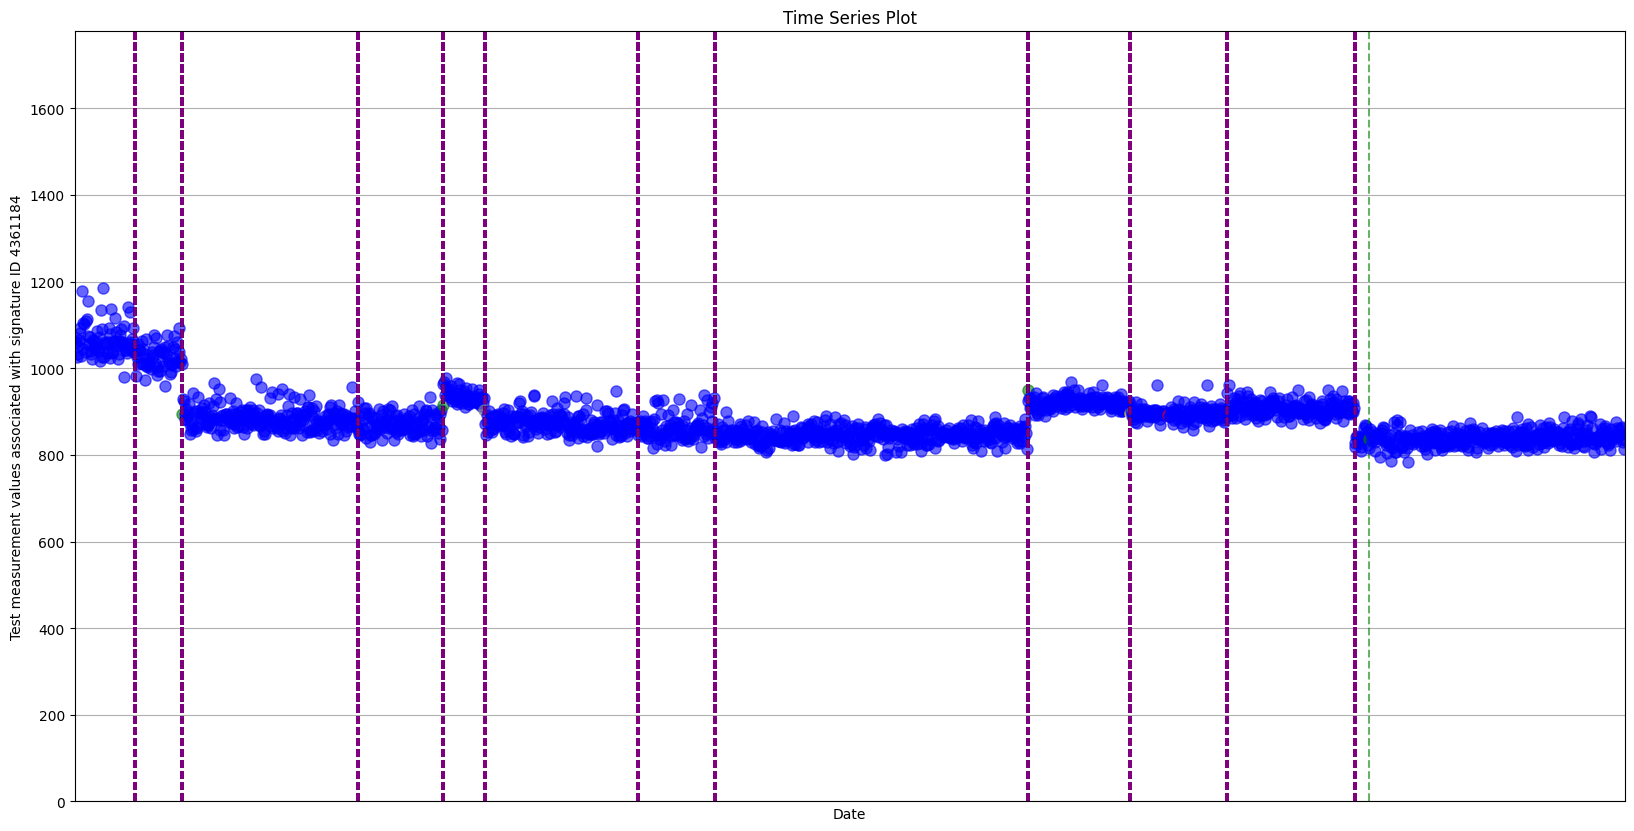

best_mongodb
0.5882352941176471


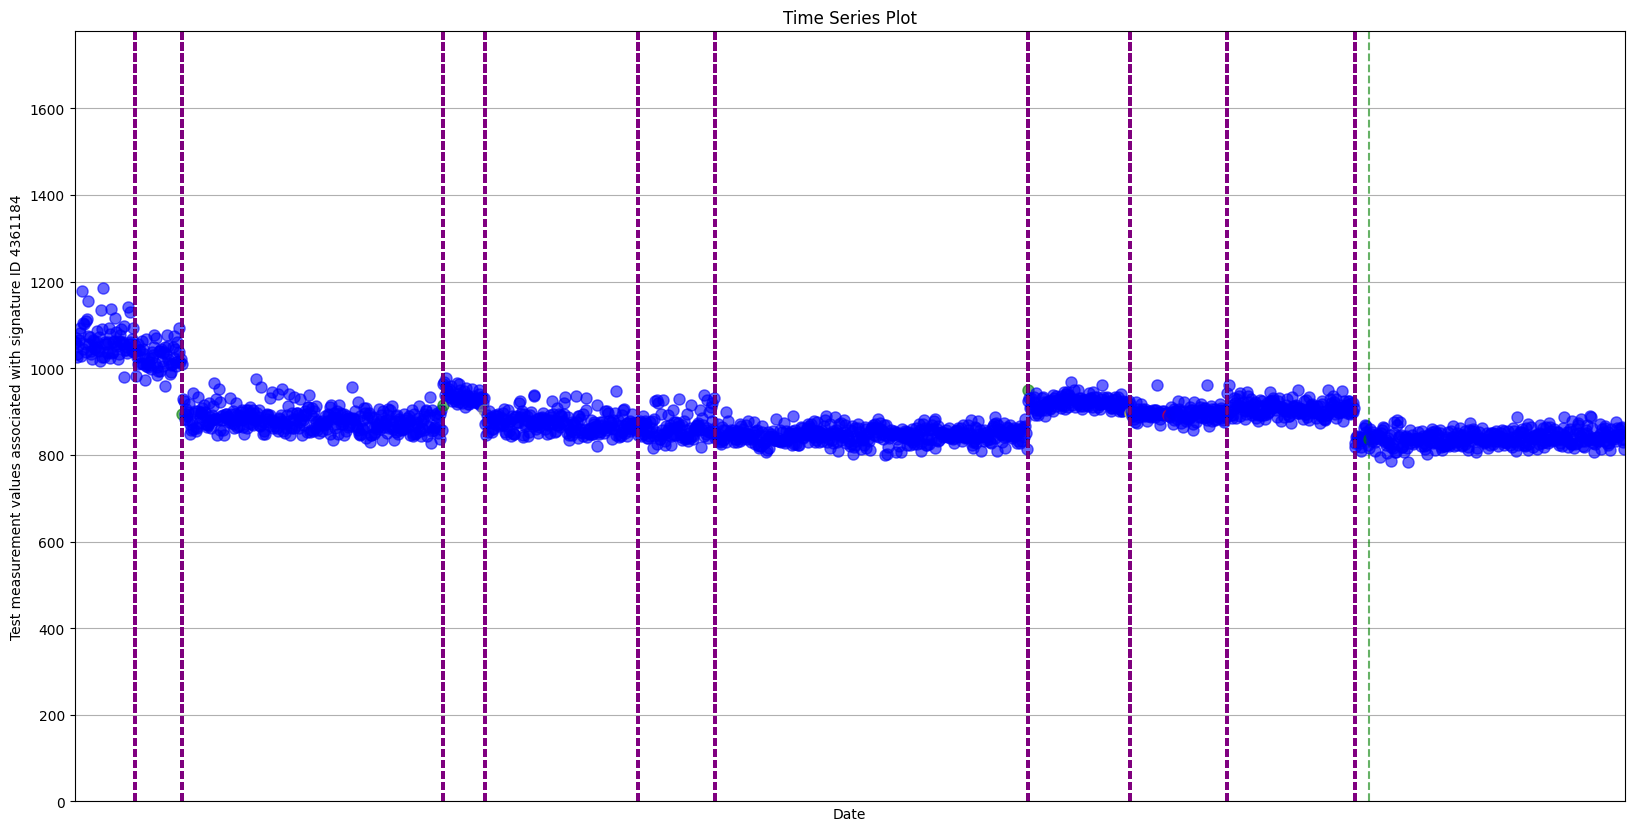

best_mongodb
0.625


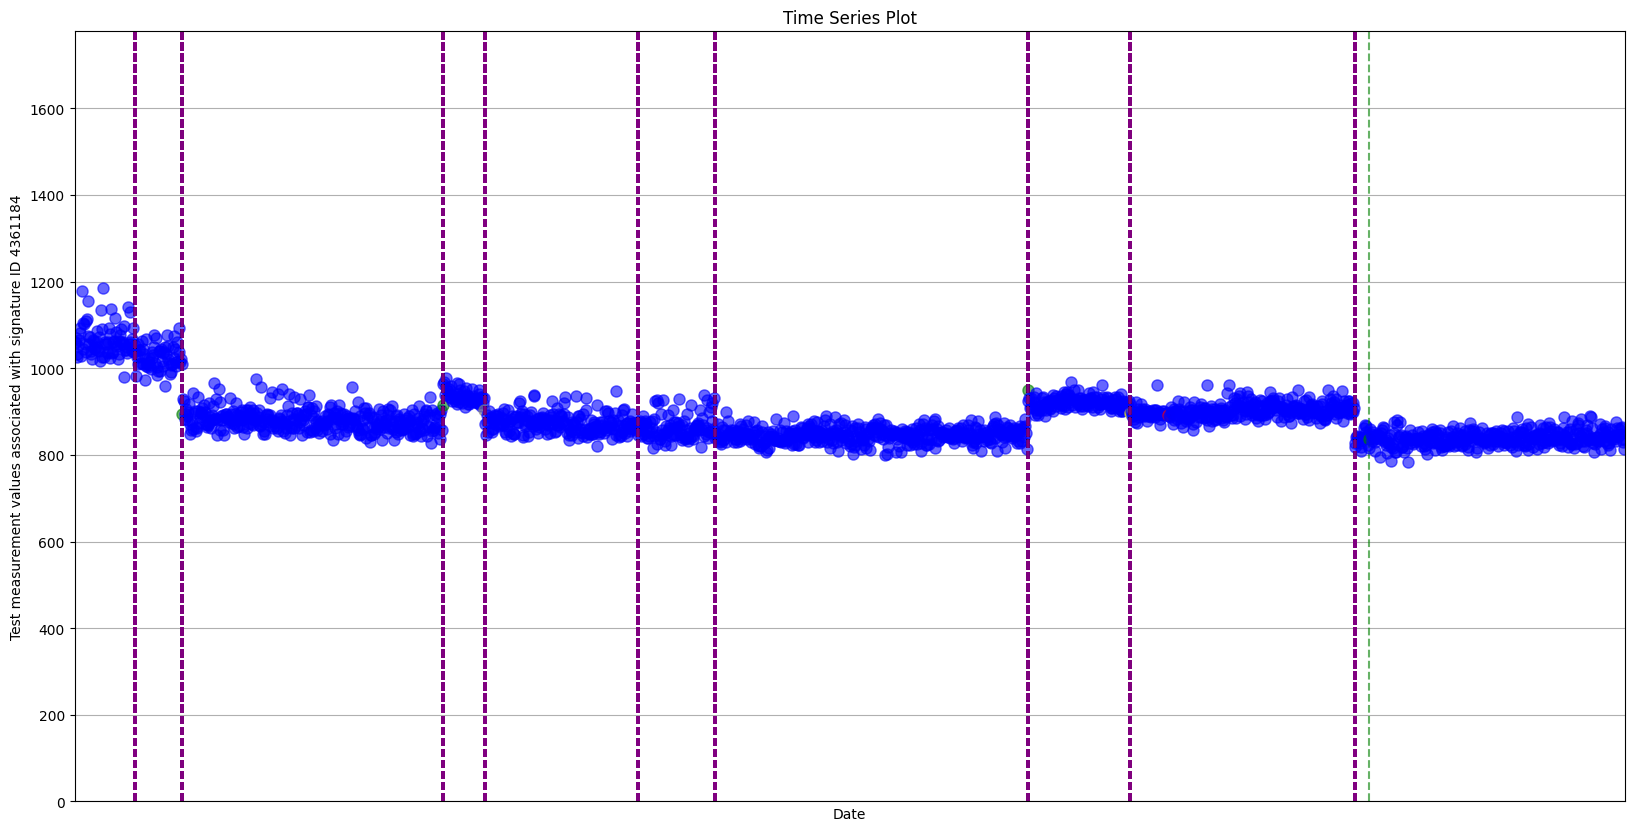

best_pelt
0.625


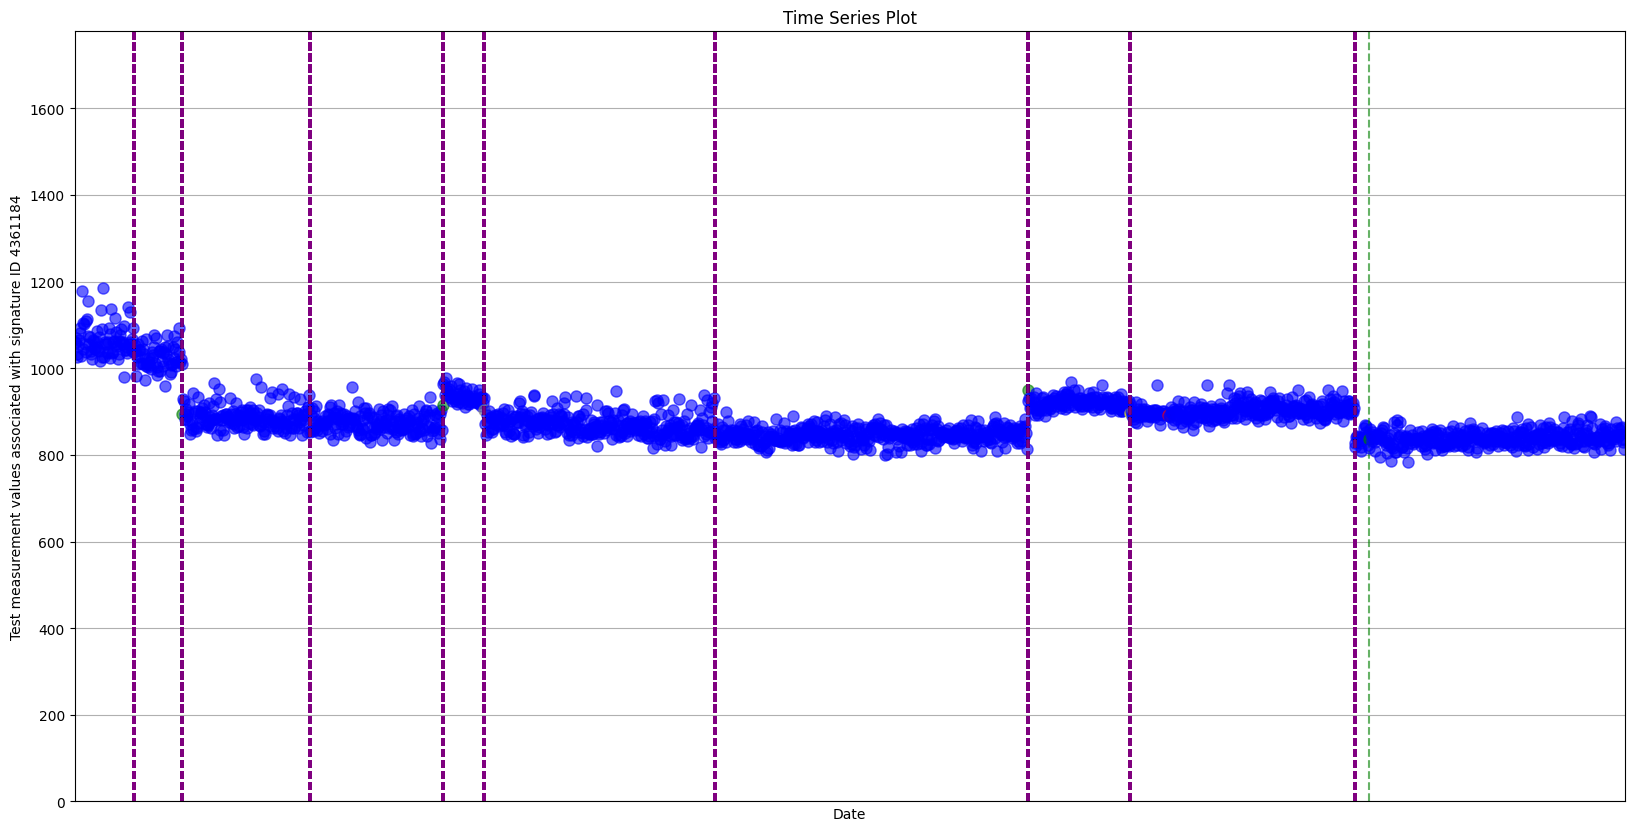

best_pelt
0.6666666666666666


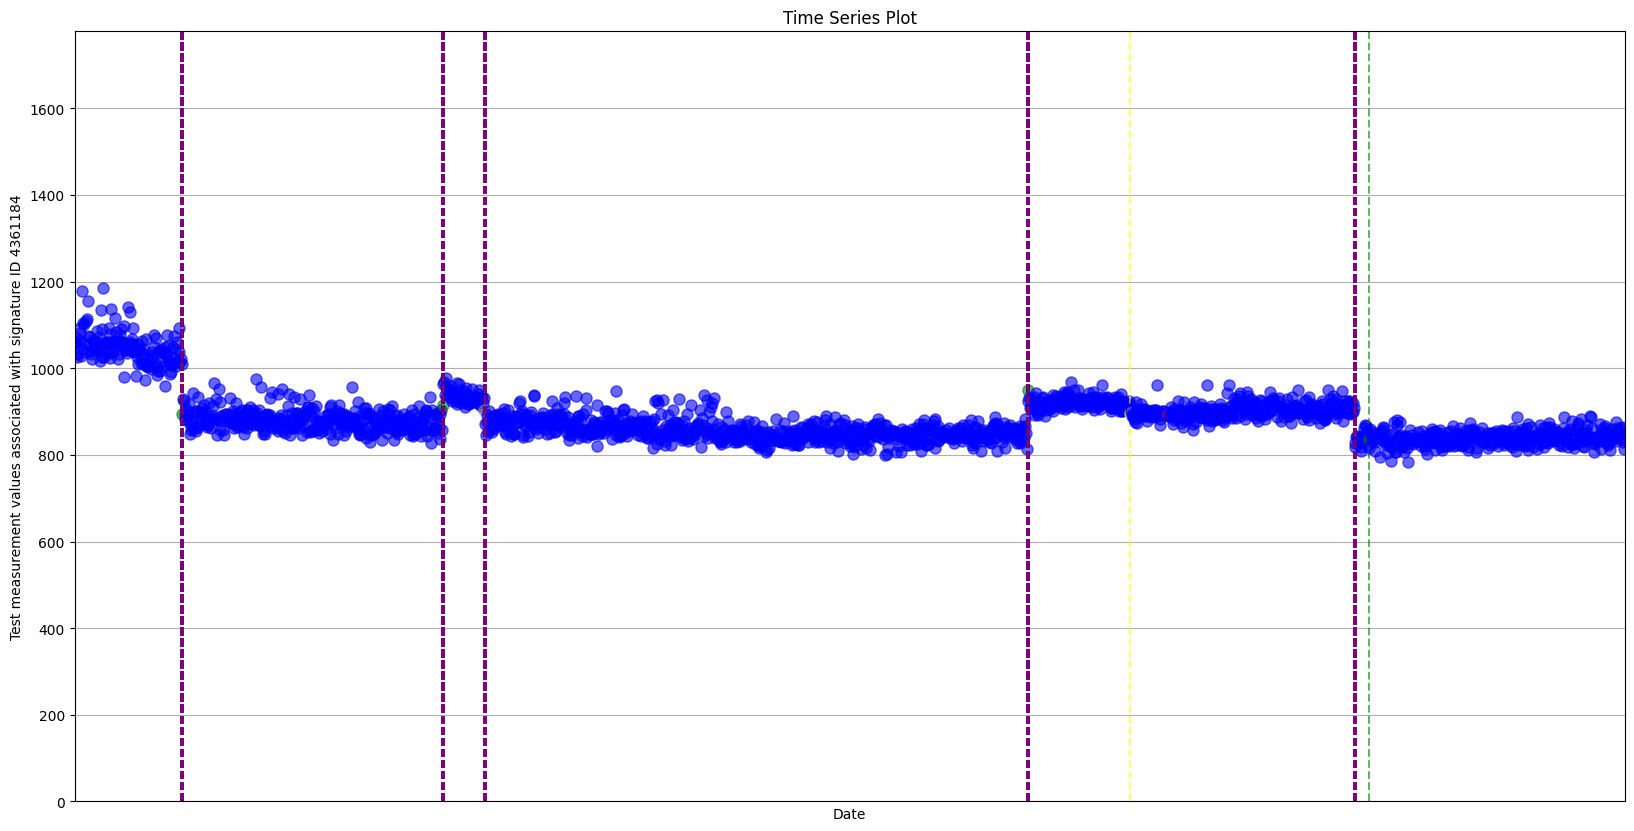

best_pelt
0.6666666666666667


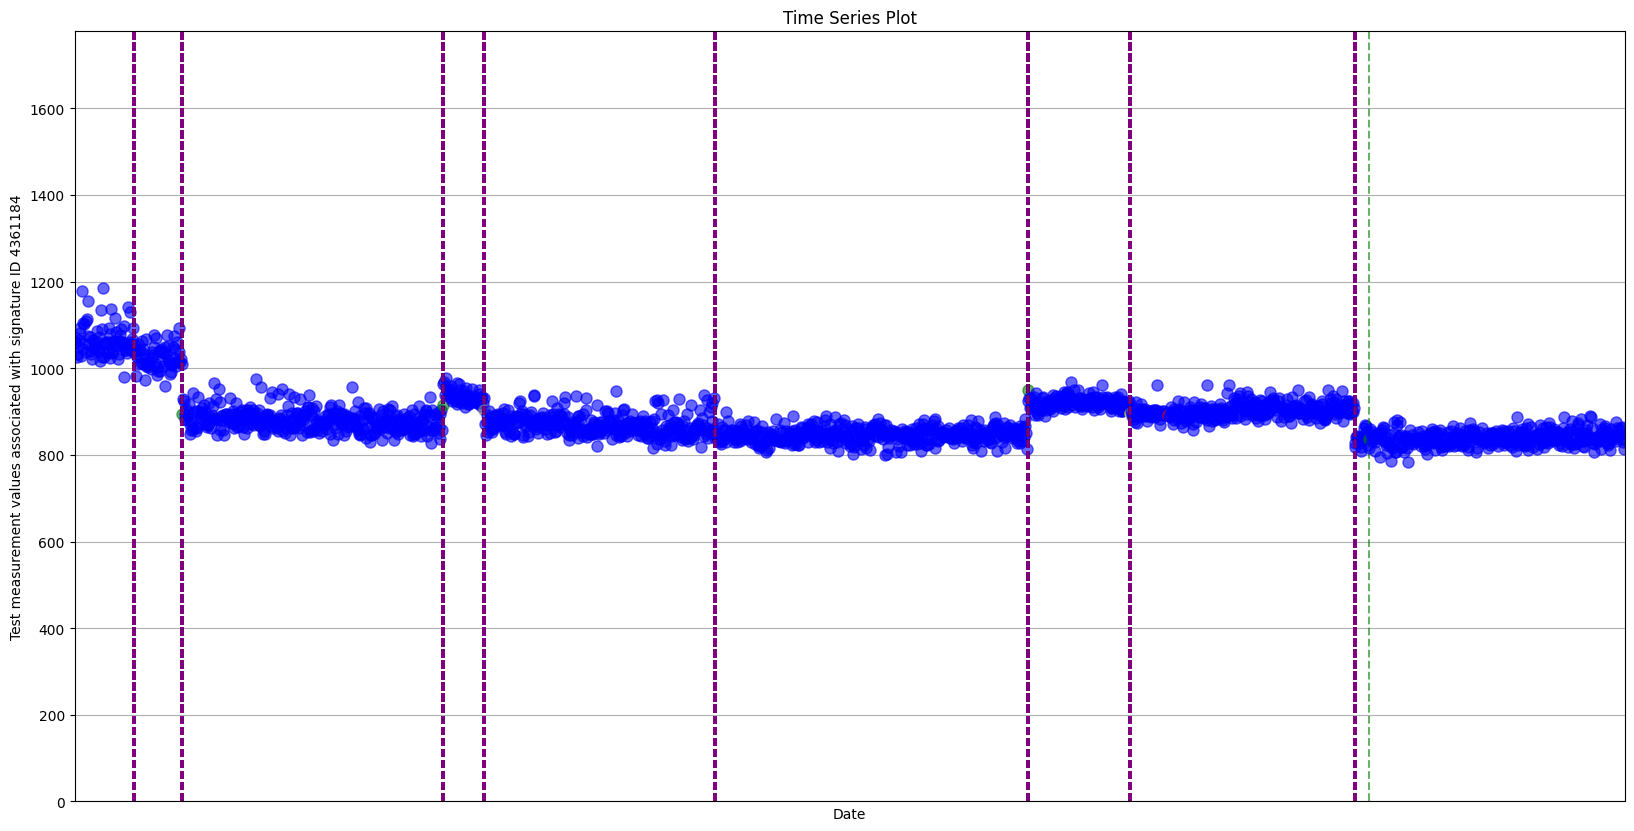

best_rfpop
0.45454545454545453


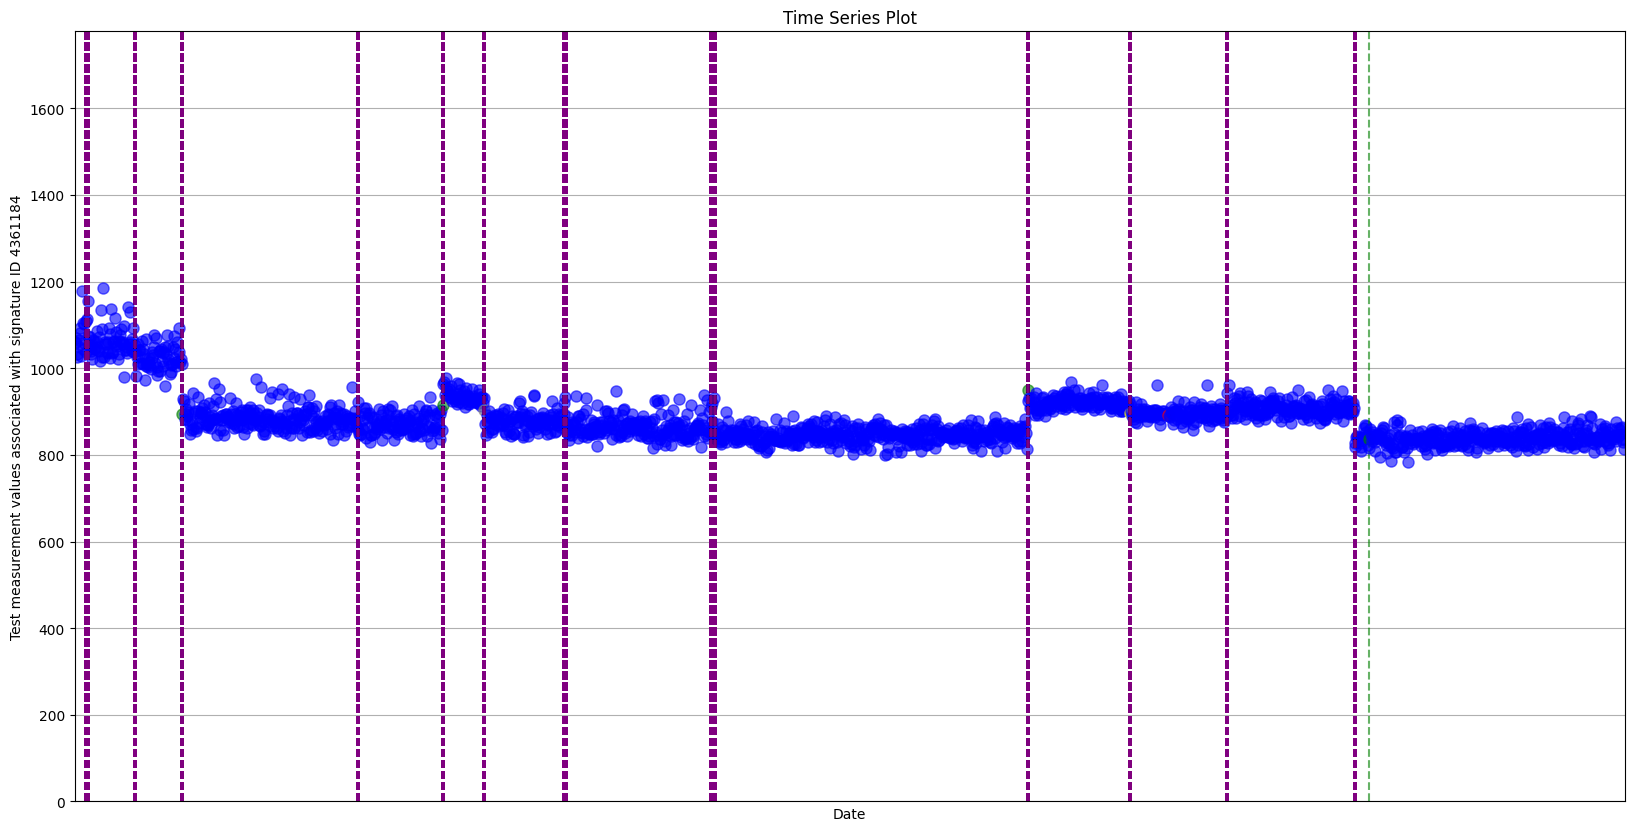

best_rfpop
0.5263157894736842


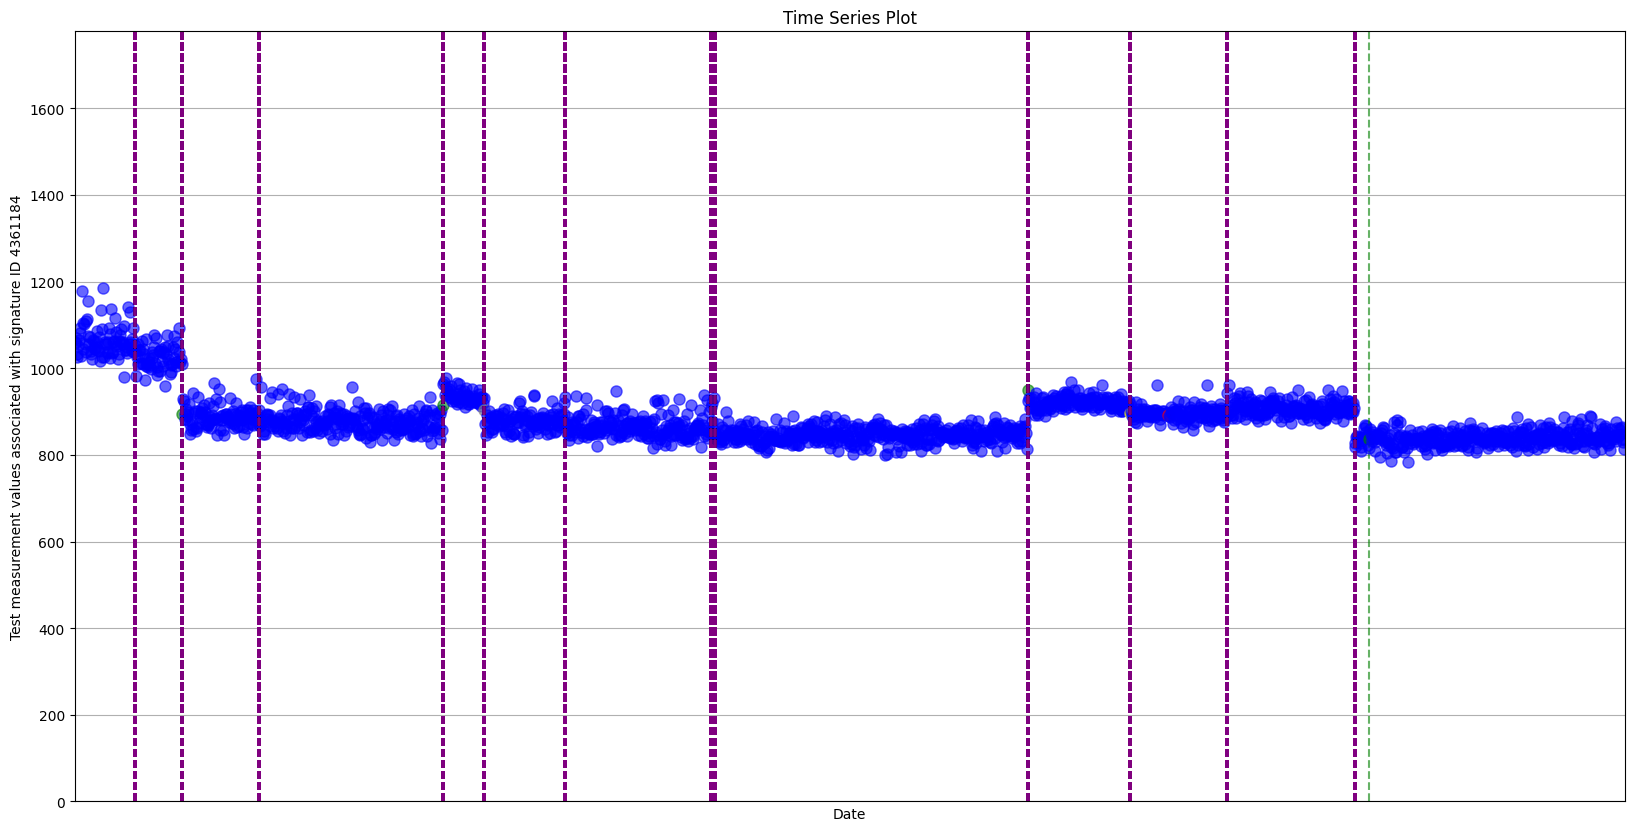

best_rfpop
0.5555555555555556


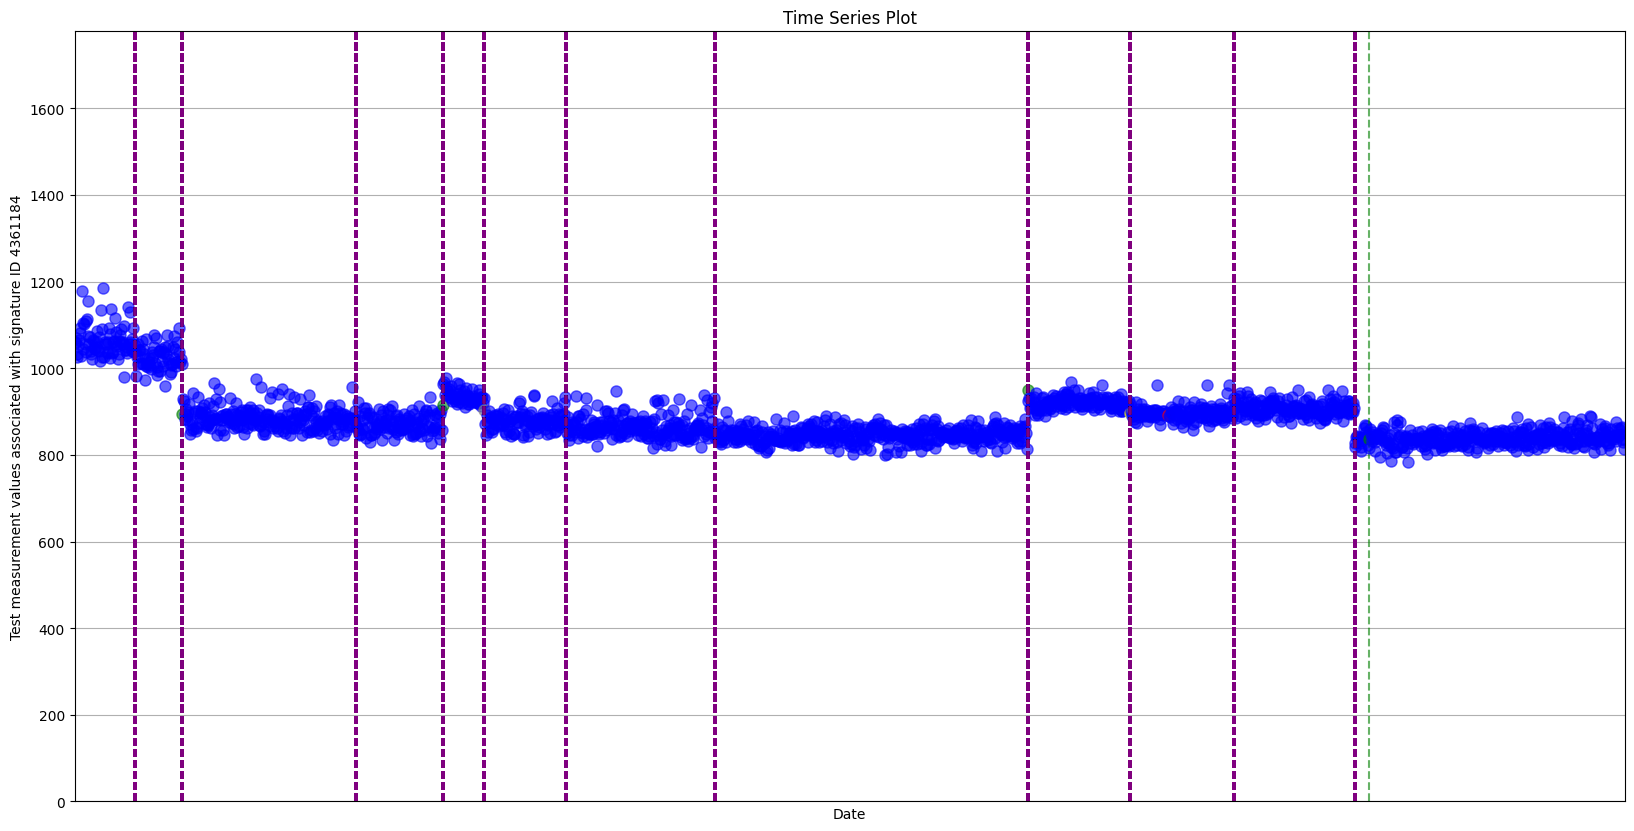

best_wbs
0.4347826086956522


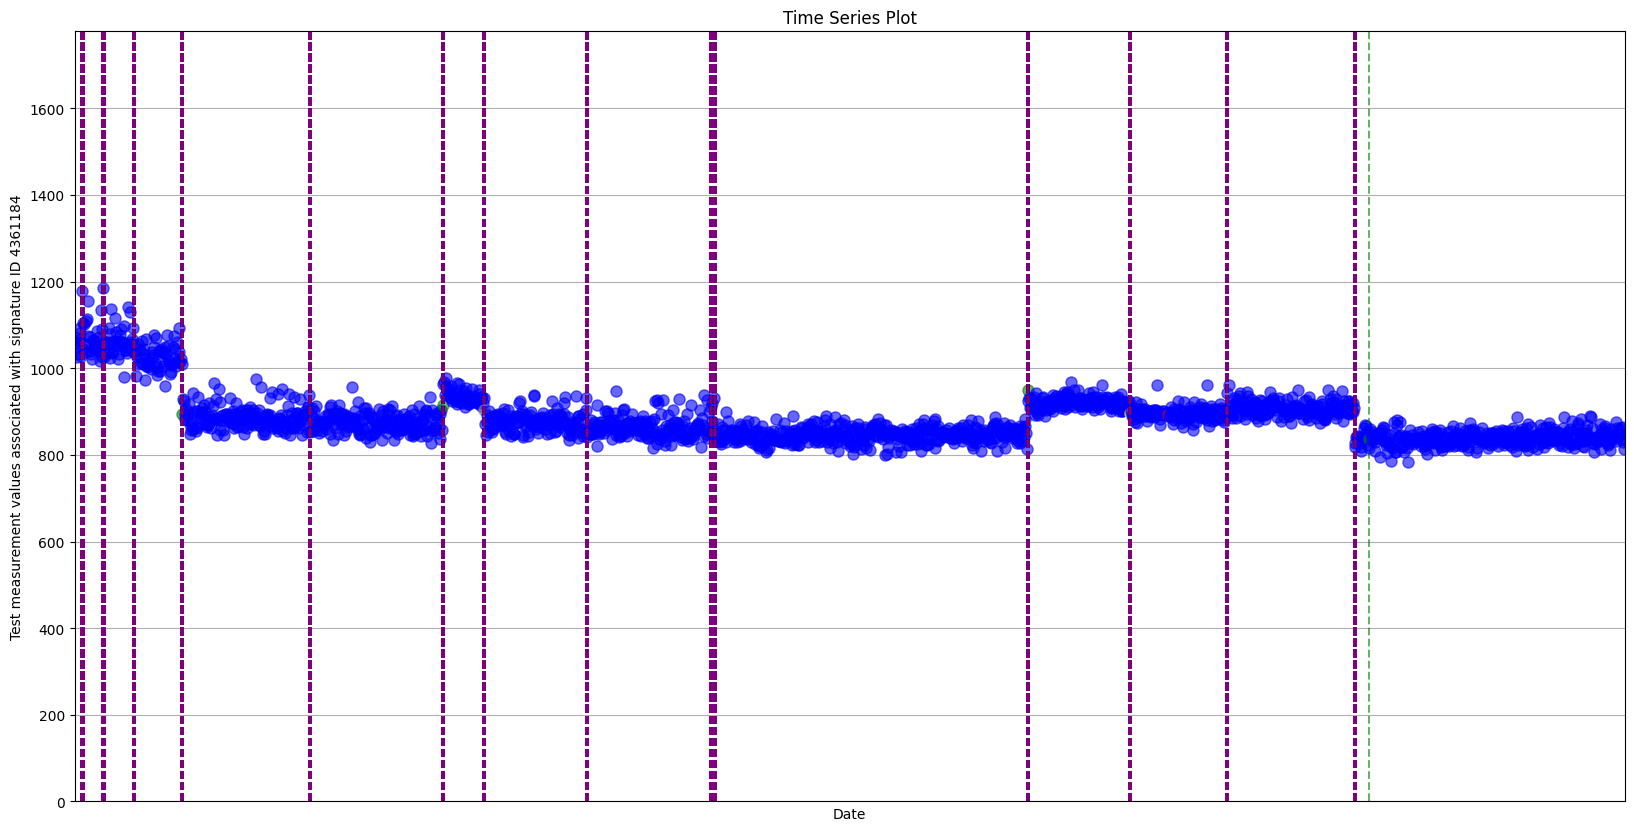

best_wbs
0.5555555555555556


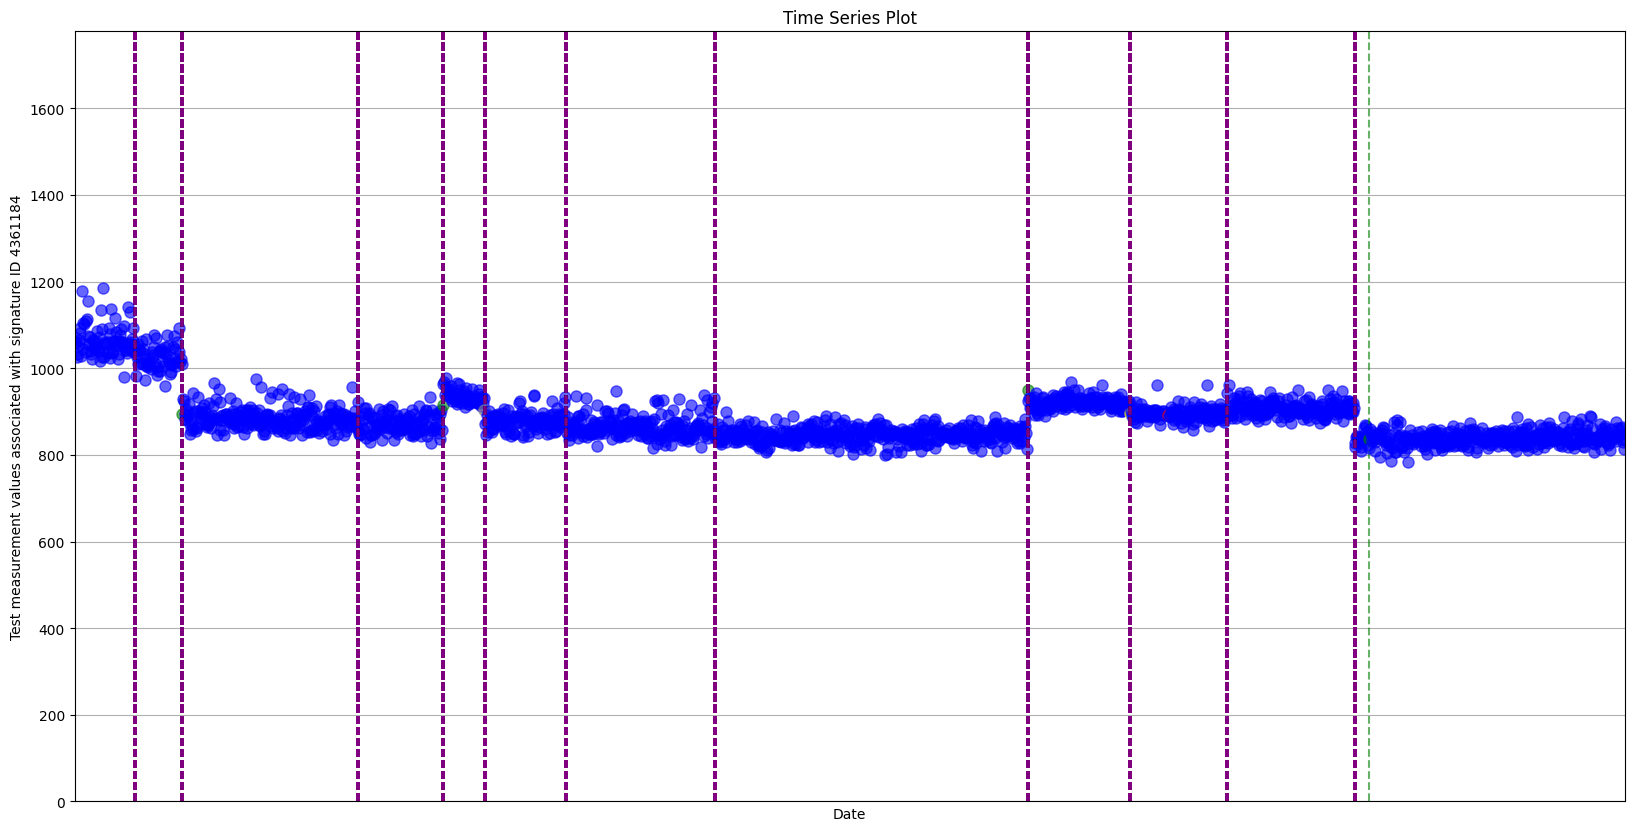

best_zero
0.2857142857142857


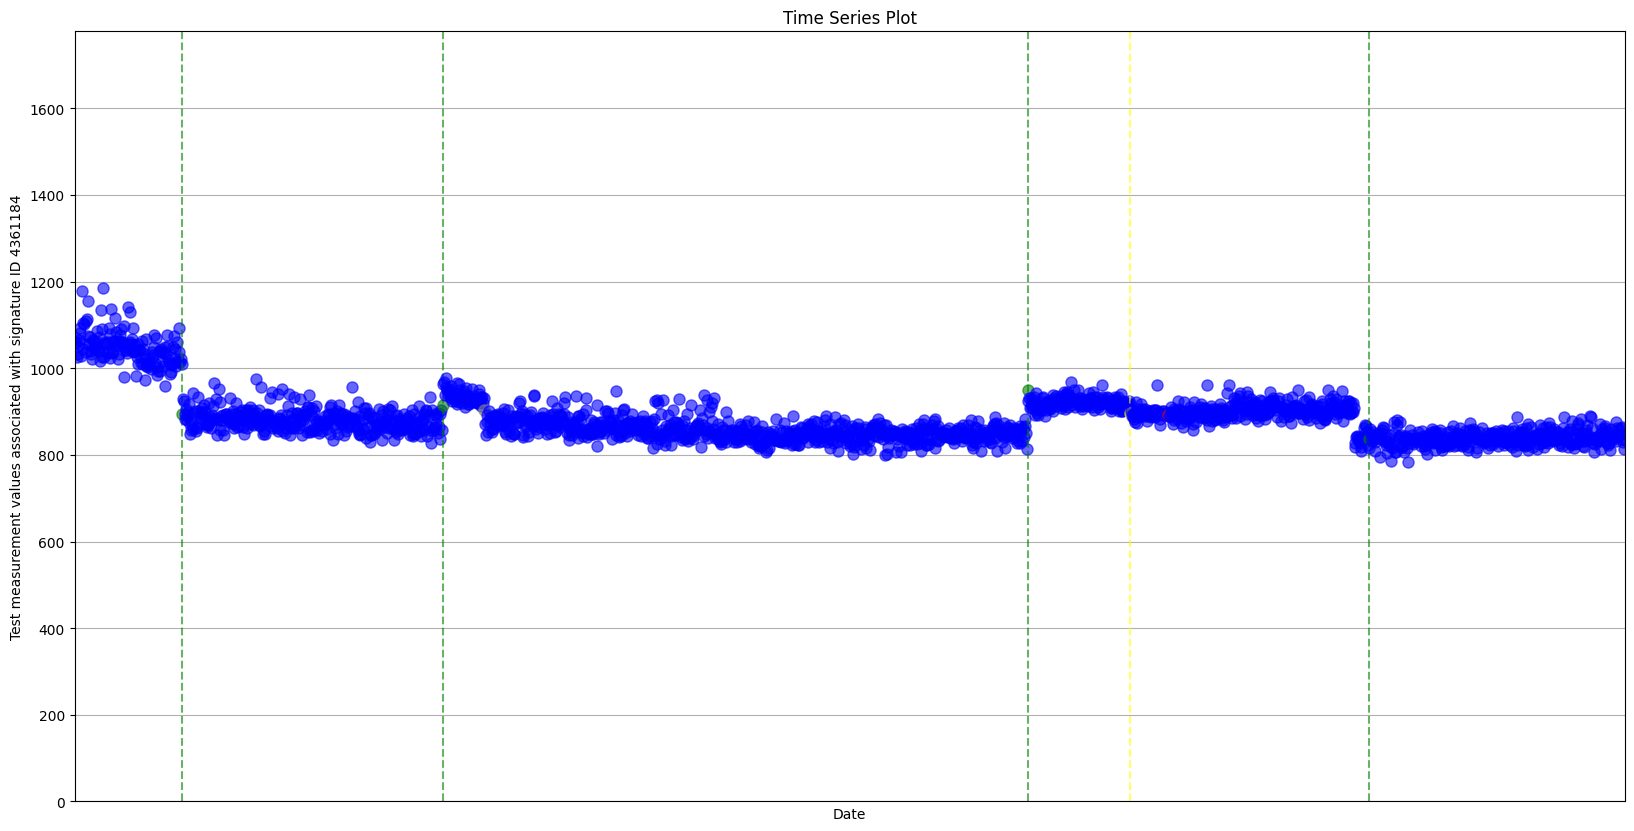

default_amoc
0.5


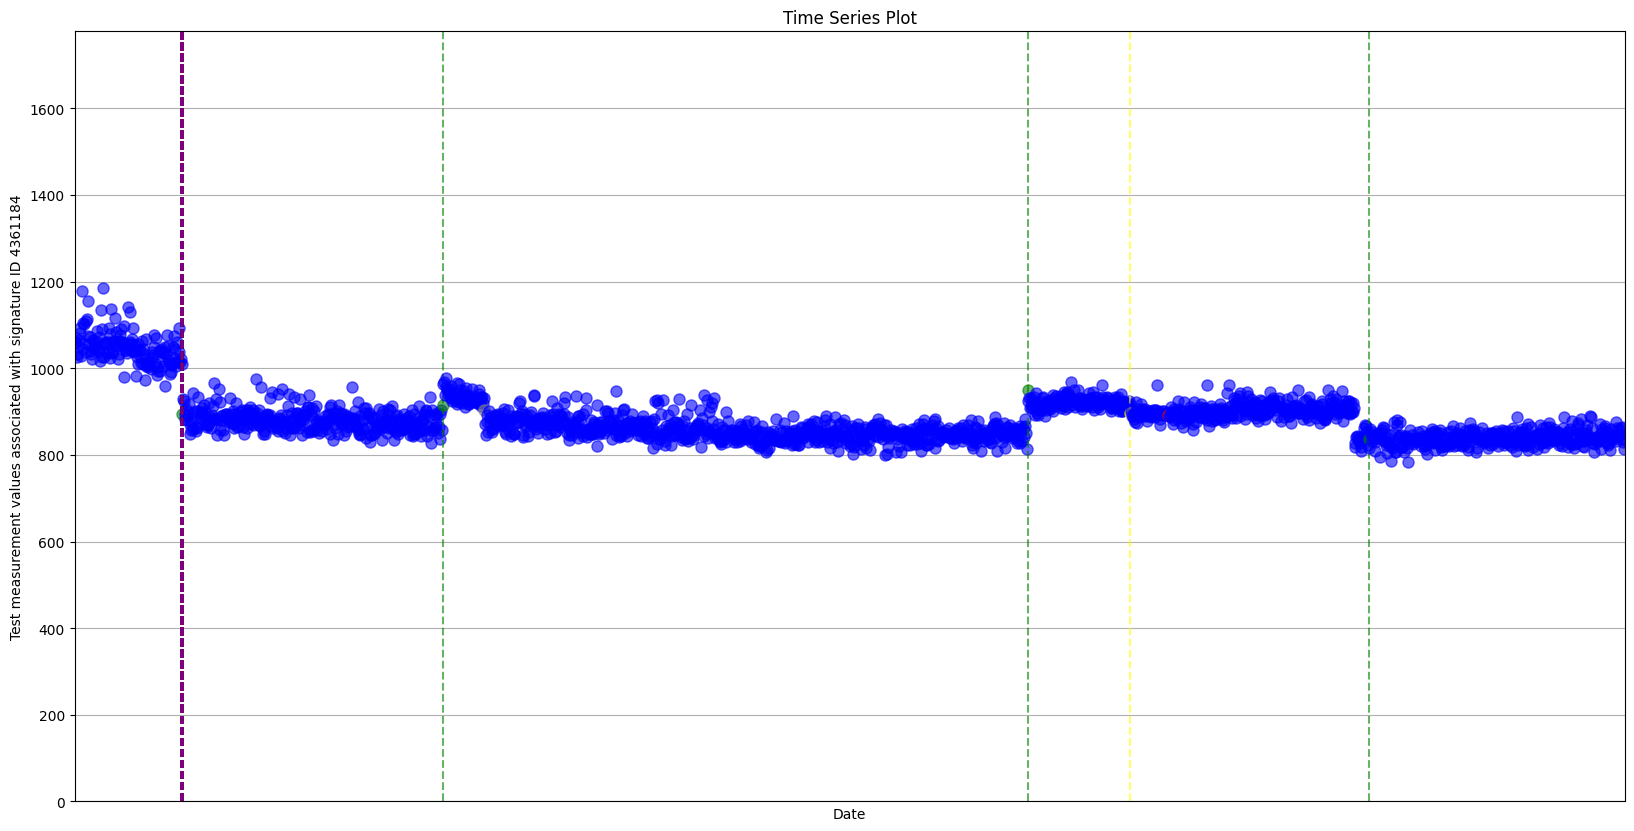

default_binseg
0.5454545454545454


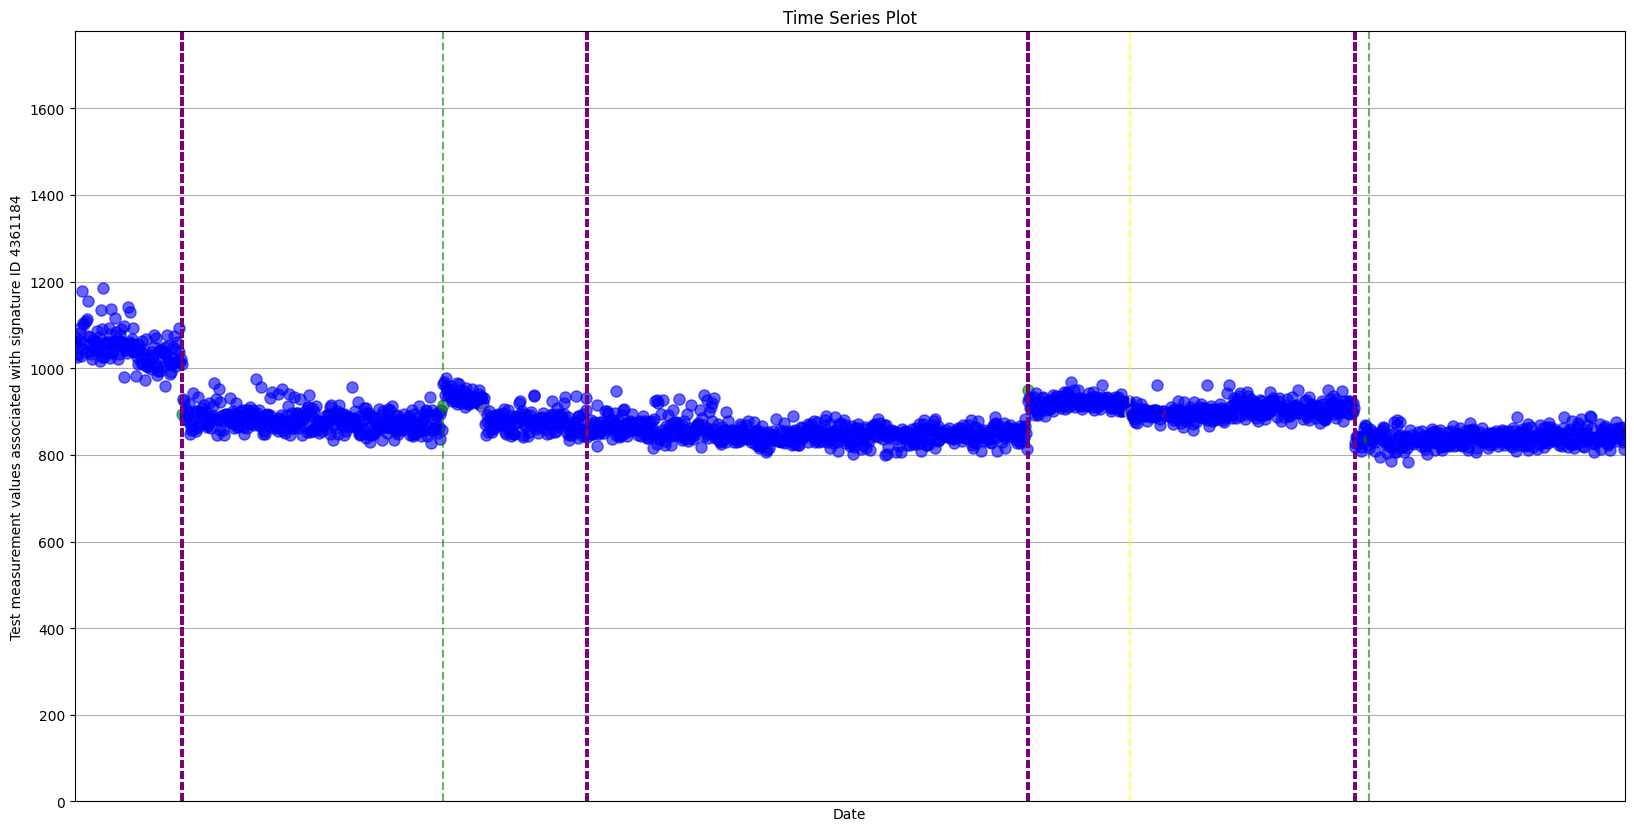

default_bocpd
0.5555555555555556


KeyboardInterrupt: 

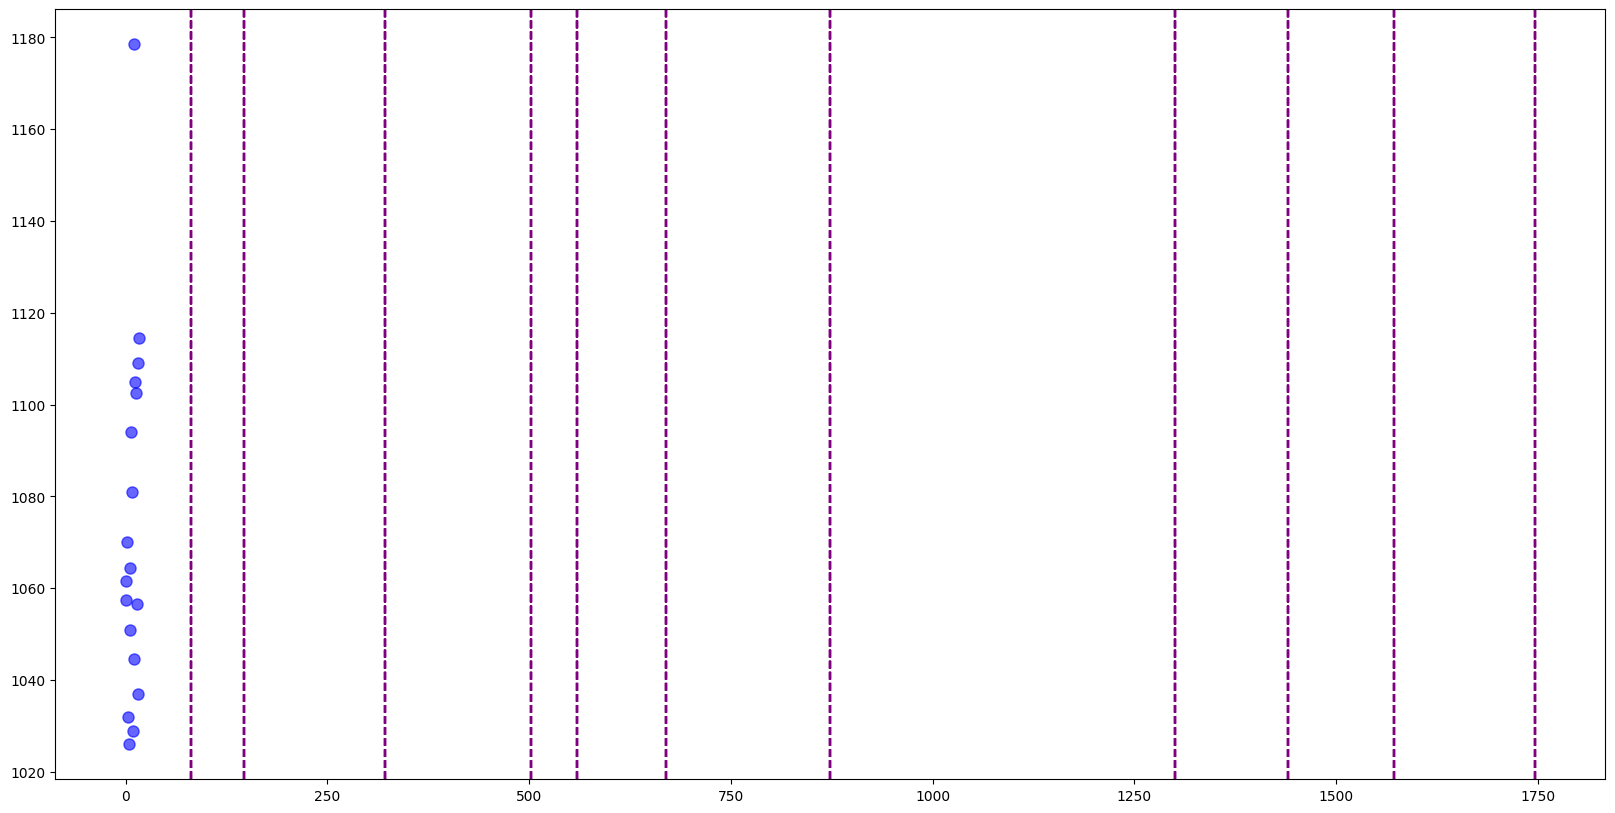

In [ ]:
for index, row in pred_df.iterrows():
    df = pd.read_csv(csv_path)
    sig_id = '4361184'
    print(row['algorithm'])
    print(row['f1'])
    display_sample(df, sig_id, True, row['cplocations'])

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/2_rectified_alerts_data.csv')
df.head(5)

<ipython-input-18-f1381a4dfc89>:4: DtypeWarning: Columns (24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/2_rectified_alerts_data.csv')


alert_id  alert_push_id  alert_prev_push_id    alert_creation_timestamp  \
0       131        1417434             1417383  2024-05-08 07:20:04.252088   
1       119        1419765             1419741  2024-05-07 11:10:00.056869   
2       118        1419741             1419737  2024-05-07 11:09:59.846429   
3       113        1421835             1421834  2024-05-06 21:17:56.248874   
4       111        1419806             1419799  2024-05-06 08:56:38.649109   

          alert_first_triaged       alert_triage_due_date alert_repository  \
0  2024-05-08 10:39:37.298425  2024-05-13 07:20:04.252088         autoland   
1  2024-05-07 18:55:14.696322  2024-05-10 11:10:00.056869         autoland   
2  2024-05-07 18:55:15.515682  2024-05-10 11:09:59.846429         autoland   
3  2024-05-07 06:47:08.784864  2024-05-09 21:17:56.248874         autoland   
4  2024-05-07 10:47:52.697472  2024-05-09 08:56:38.649109         autoland   

   alert_framework  test_id  test_status  test_series_signature_id  \
0                1      475            2                   4768506   
1                1      452            3                   5095375   
2                1      451            3                   5095386   
3                2      425            3                   4762243   
4                1      422            2                   5095349   

   test_series_signature_framework_id  \
0                                   1   
1                                   1   
2                                   1   
3                                   2   
4                                   1   

       test_series_signature_signature_hash  \
0  93d9d1ddeebe0b6a61d1d9360b1afec24d9a1051   
1  68d1cd9dc3d3a344a6acdc9e374f72e3267a7854   
2  2f9b6aa82dda454ec080ed56a9c027bd7618ff0f   
3  f15123eefd1d4b7e0fa3a807de15e3fefa4a013f   
4  ec5d933142c131186665a38099e907f427f87e08   

  test_series_signature_machine_platform  \
0              windows10-64-shippable-qr   
1              windows10-64-shippable-qr   
2              windows10-64-shippable-qr   
3                                linux64   
4              windows10-64-shippable-qr   

                         test_series_signature_test  \
0  startup_about_home_paint_realworld_webextensions   
1                                     issue4934.pdf   
2                                     issue5084.pdf   
3                                               NaN   
4                                     issue4706.pdf   

                        test_series_signature_suite  \
0  startup_about_home_paint_realworld_webextensions   
1                                          pdfpaint   
2                                          pdfpaint   
3                        sccache cache_write_errors   
4                                          pdfpaint   

   test_series_signature_lower_is_better  test_series_signature_has_subtests  \
0                                   True                               False   
1                                   True                               False   
2                                   True                               False   
3                                   True                                True   
4                                   True                               False   

  test_series_signature_option_collection_hash test_series_signature_tags  \
0     102210fe594ee9b33d82058545b1ed14f4c8206e                        NaN   
1     102210fe594ee9b33d82058545b1ed14f4c8206e                        NaN   
2     102210fe594ee9b33d82058545b1ed14f4c8206e                        NaN   
3     68c46e84d76d2e7e686e5158bf598909abd4e45b                        NaN   
4     102210fe594ee9b33d82058545b1ed14f4c8206e                        NaN   

  test_series_signature_extra_options test_series_signature_measurement_unit  \
0     e10s, fission, stylo, webrender                                    NaN   
1  e10s, fission, stylo, webrender-sw                                     ms   
2  

In [ ]:
alert_status_mapping = {
    0: "untriaged",
    1: "downstream",
    2: "reassigned",
    3: "invalid",
    4: "improvement",
    5: "investigating",
    6: "wontfix",
    7: "fixed",
    8: "backedout"
}
test_status_mapping = {
    0: "untriaged",
    1: "downstream",
    2: "reassigned",
    3: "invalid",
    4: "acknowledged"
}
category_mapping = {
    'investigating': 'SP',
    'reassigned': 'TP',
    'invalid': 'FP',
    'improvement': 'TP',
    'fixed': 'TP',
    'wontfix': 'TP',
    'untriaged': 'SP',
    'backedout': 'TP',
    'downstream': 'TP',
    'acknowledged': 'TP',
}
df['alert_status_general'] = df['alert_status'].map(alert_status_mapping)
df["alert_status_general"] = df["alert_status_general"].replace(category_mapping)
df['test_status_general'] = df['test_status'].map(alert_status_mapping)
df["test_status_general"] = df["test_status_general"].replace(category_mapping)

In [ ]:
df.loc[df['test_manually_created'] == True, 'test_status_general'] = "FN"
df.loc[df['test_manually_created'] == True, 'alert_status_general'] = "FN"

In [ ]:
df_processed_1 = df[['test_id', 'test_status_general']].drop_duplicates()
df_processed_2 = df[['test_id', 'alert_status_general']].drop_duplicates()

The following stats showcase the number of data points per category (ones with alert statuses, which are the stats under test_status_general, and the ones with alert summary statuses, under alert_status_general)

In [ ]:
print(df_processed_1['test_status_general'].value_counts())
print(df_processed_2['alert_status_general'].value_counts())

test_status_general
TP    14891
SP     2242
FP     1397
FN      291
Name: count, dtype: int64
alert_status_general
TP    10757
SP     6851
FP      922
FN      291
Name: count, dtype: int64


The following graphs showcase the distribution of number of alerts per alert summary according to the alert summary status. The main observation is that alert summaries with at least one alert created manually tend to have exactly one alert, unlike the alert summaries with status of TP or FP

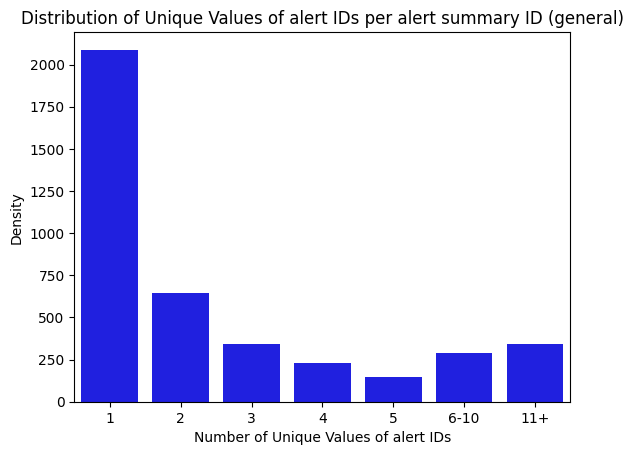

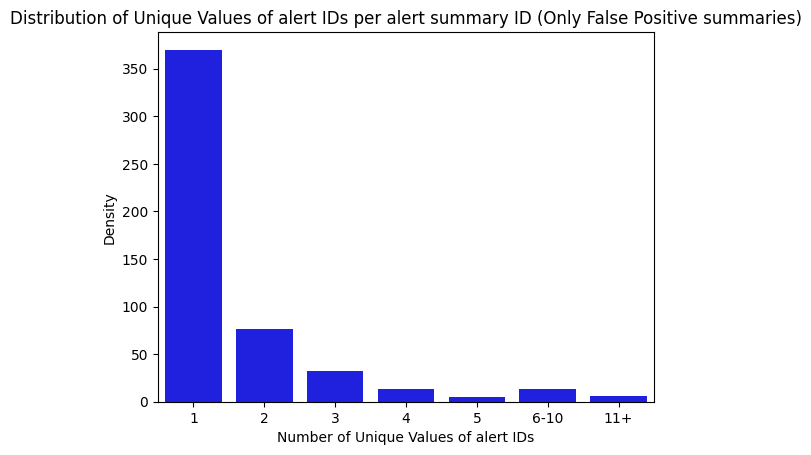

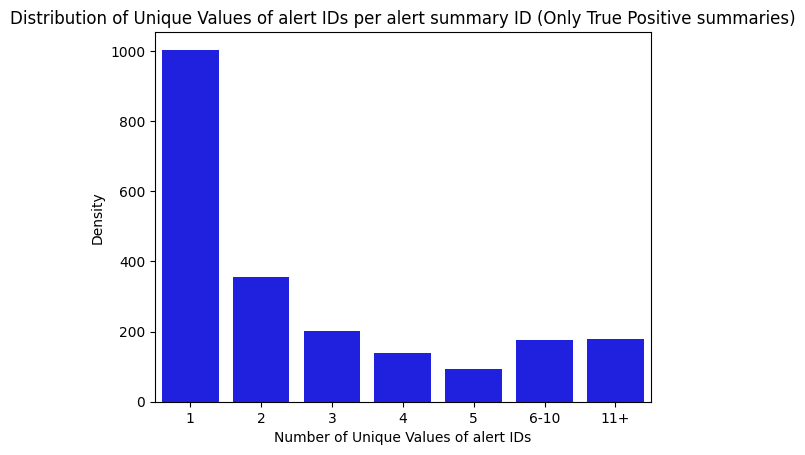

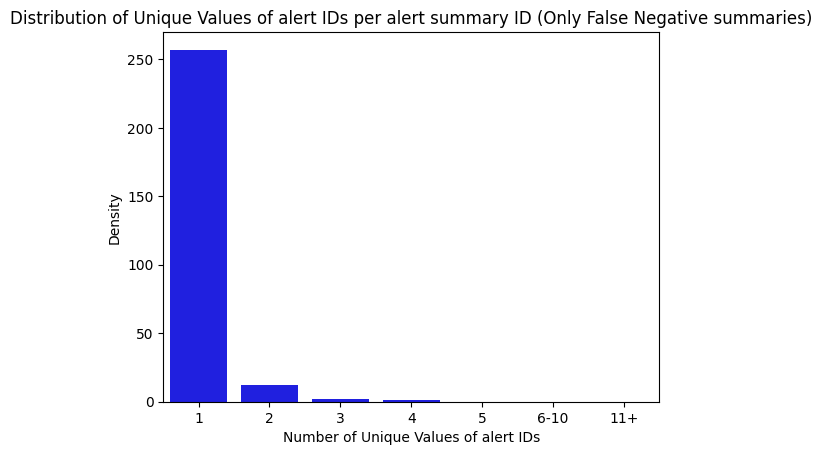

In [ ]:
import numpy as np
def display_hist(dataf, arg):
  counts = dataf.groupby('alert_id')['test_id'].nunique()
  '''
  log_counts = np.log1p(counts)
  sns.histplot(log_counts, kde=True, bins=len(counts), color='blue')
  plt.title('Distribution of Unique Values of alert IDs per alert summary ID')
  plt.xlabel('Number of Unique Values of alert IDs')
  plt.ylabel('Density')
  plt.show()
  '''
  bins = [0, 1, 2, 3, 4, 5, 10, float('inf')]
  labels = ['1', '2', '3', '4', '5', '6-10', '11+']
  binned_counts = pd.cut(counts, bins=bins, labels=labels, right=True)
  binned_counts_distribution = binned_counts.value_counts(sort=False)
  sns.barplot(x=binned_counts_distribution.index, y=binned_counts_distribution.values, color='blue')
  plt.title('Distribution of Unique Values of alert IDs per alert summary ID (' + arg + ')')
  plt.xlabel('Number of Unique Values of alert IDs')
  plt.ylabel('Density')
  plt.show()

alert_alert_summary_distro = df[['test_id', 'alert_id']]
display_hist(alert_alert_summary_distro, 'general')
alert_alert_summary_distro_fp = df[df['alert_status_general'] == 'FP'][['test_id', 'alert_id']]
display_hist(alert_alert_summary_distro_fp, 'Only False Positive summaries')
alert_alert_summary_distro_tp = df[df['alert_status_general'] == 'TP'][['test_id', 'alert_id']]
display_hist(alert_alert_summary_distro_tp, 'Only True Positive summaries')
alert_alert_summary_distro_fn = df[df['alert_status_general'] == 'FN'][['test_id', 'alert_id']]
display_hist(alert_alert_summary_distro_fn, 'Only False Negative summaries')

The following graph helps with understanding the tradeoff between Precision and Recall for hyper parameter configurations providing the best results on average. The needed data is a CSV from the TCPDBench after generating the stats (the CSVs exist under /TCPDBench/analysis/output)

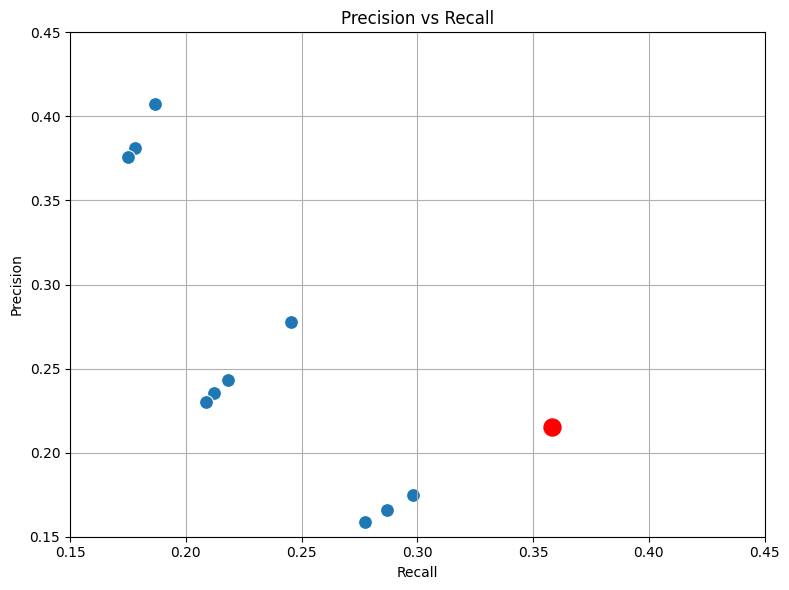

Row with the highest F1 Score:
Key          {"kernel": "rbf", "maxcp": 10, "minsize": 5.0}
Precision                                          0.215007
Recall                                             0.358102
F1 Score                                           0.254558
Name: 1, dtype: object


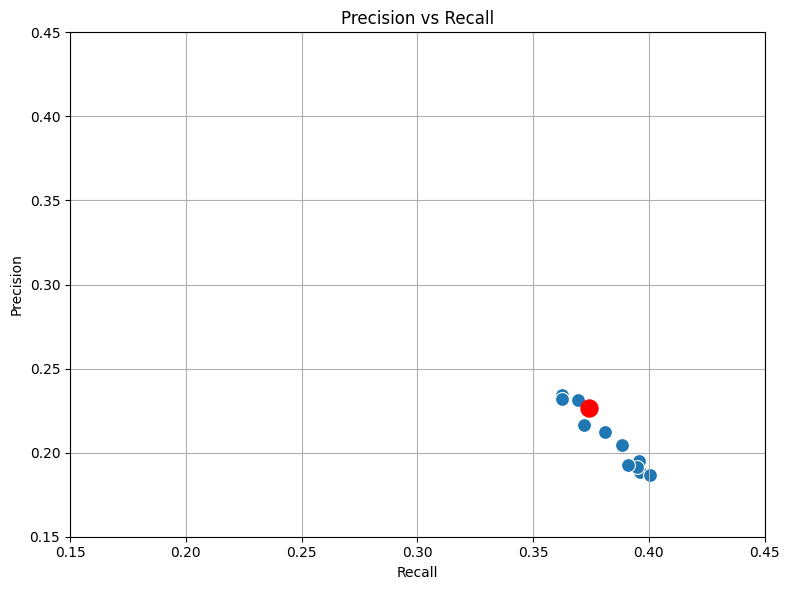

Row with the highest F1 Score:
Key          {"permutations": 200, "pvalue": 0.01}
Precision                                 0.226808
Recall                                    0.374001
F1 Score                                  0.250274
Name: 6, dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_kcpa = pd.read_csv('/content/metrics_of_best_kcpa.csv')
df_mongodb = pd.read_csv('/content/metrics_of_best_mongodb.csv')
def plot_precision_recall_f1(df):
    # Identify the row with the highest F1 Score
    max_f1_row = df.loc[df['F1 Score'].idxmax()]

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Recall', y='Precision', s=100)

    # Highlight the point with the highest F1 Score
    plt.scatter(max_f1_row['Recall'], max_f1_row['Precision'], color='red', s=150, label='Max F1 Score')

    plt.xlim(0.15, 0.45)
    plt.ylim(0.15, 0.45)

    # Add plot details
    plt.title('Precision vs Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)

    # Remove legend
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Display the row with the highest F1 Score
    print("Row with the highest F1 Score:")
    print(max_f1_row)
plot_precision_recall_f1(df_kcpa)
plot_precision_recall_f1(df_mongodb)

The following stat is to see if the results obtained by the TCPDBench tool are correct or not (snity check)

In [ ]:
best_per_dataset = filtered_df_metrics.groupby('dataset')[['precision', 'recall', 'f1']].max()

average_best_metrics = best_per_dataset.mean()
q
result = {
    "average_best_precision": average_best_metrics['precision'],
    "average_best_recall": average_best_metrics['recall'],
    "average_best_f1": average_best_metrics['f1']
}

json_data = json.dumps(result, indent=4)

print(json_data)

{
    "average_best_precision": 0.686577523769769,
    "average_best_recall": 0.9964726631393297,
    "average_best_f1": 0.7949735412685489
}


In [ ]:
display(averaged_metrics.loc[averaged_metrics['f1'].idxmax()]['args'])

"{'mozilla_method': 'Mozilla', 'bocpd_lambda': 100, 'bocpd_prior_a': 100, 'bocpd_prior_b': 0.01, 'bocpd_prior_k': 100}"